# Bank Marketing Campaign Analysis
## Methodological Framework: CRISP-DM & AWS Well-Architected ML

### Methodology Integration
This project combines two powerful frameworks:

#### 1. CRISP-DM (Cross-Industry Standard Process for Data Mining)
- **Business Understanding**: Define objectives and requirements
- **Data Understanding**: Initial data collection and analysis
- **Data Preparation**: Data cleaning and feature engineering
- **Modeling**: Modeling techniques
- **Evaluation**: Assess model against business objectives
- **Deployment**: Plan model deployment

#### 2. AWS Well-Architected ML Framework
- **Reliability**: 
  - Robust cross-validation
  - Error handling
  - Data quality checks

- **Security**: 
  - Data privacy considerations
  - Ethical use of customer data
  - Bias detection and mitigation

- **Performance Efficiency**:
  - Optimized preprocessing pipeline
  - Efficient model selection
  - Resource-aware implementation

- **Cost Optimization**:
  - Balanced dataset creation (SMOTE/SMOTEENN)
  - Model complexity management
  - Efficient feature selection

- **Operational Excellence**:
  - Reproducible code structure
  - Clear documentation
  - Modular implementation

### Framework Synergies
1. **Data Quality & Reliability**:
   - CRISP-DM: Data understanding and preparation
   - AWS: Reliability pillar for robust implementation

2. **Model Development**:
   - CRISP-DM: Modeling and evaluation phases
   - AWS: Performance efficiency and operational excellence

3. **Business Impact**:
   - CRISP-DM: Business understanding and deployment.
   - AWS: Cost optimization and security considerations.

---
### 1. Bussiness Understanding
 - Marketing campaing from 2008 to 2010.
 - Target: `y` describes wether the customer agrees with a term deposit subscription (yes/no).
 - Bussiness goal: The marketing team is to use the information extracted from the dataset to better orginze a strategy to possitevely indentify costumers that are more likely to say `yes` to subscribe to the deposit. Therefore, the objective is to better utilize the resources of the bank allowing a more room of improvements in the calls.
 - Challenges: Its expected to have the samples of a larger distribution of `no` subscription compared to the `yes`(high imbalnce).


### 2. Data Understanding

##### 2.1 Dependencies for data analyis and Machine Learning algorithms

In [48]:
# Standard library imports
from typing import Dict, List, Tuple, Any
import json
import pickle

# Data manipulation and analysis
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Machine learning
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    precision_recall_curve,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    average_precision_score,
    auc,
)
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    train_test_split,
    learning_curve,
    cross_validate
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Set up for plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

In [4]:
# Set a ramdom seed for reproducibility
# The random seed method hold and arbitrary number
np.random.seed(98)

#### 2.2 Load the dataset.

In [5]:
# By exploring the dataset we can see that the data is a CSV file with a delimiter of semi-colon ';'.
# Load the dataset in to a pandas dataframe.
df = pd.read_csv('../data/raw/bank.csv', delimiter=';')
print(f"Data Shape:{df.shape}")


Data Shape:(4521, 17)


#### 2.3 Display the basic information of the dataset.

- By the description of the dataset there are 0 missing values. 

In [6]:
#Double checking for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#Display the 5 firt rows of the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
#Display the 5 last rows of the dataset
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [10]:
# Display the columns of the dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4521.0,NaN,NaN,NaN,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
job,4521,12,management,969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,4521,3,married,2797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,4521,4,secondary,2306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,4521,2,no,4445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,4521.0,NaN,NaN,NaN,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
housing,4521,2,yes,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,4521,2,no,3830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,4521,3,cellular,2896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,4521.0,NaN,NaN,NaN,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0


In [12]:
# The skew method is to determine the skewness of the dataset.
# This method is only applied to the numerical type of data.
# 0 means the data is normally distributed.
# values close to 1 means the data is skewed to the right.
# values close to -1 means the data is skewed to the left.
df.skew(numeric_only=True)

age         0.699501
balance     6.596431
day         0.094627
duration    2.772420
campaign    4.743914
pdays       2.717071
previous    5.875259
dtype: float64

In [13]:
# Display the unique values of the dataset.
# Selet all the 'object' type of columns and apply the values_counts method which will display the unique values of the columns.

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'job':
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64


Value counts for column 'marital':
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64


Value counts for column 'education':
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64


Value counts for column 'default':
default
no     4445
yes      76
Name: count, dtype: int64


Value counts for column 'housing':
housing
yes    2559
no     1962
Name: count, dtype: int64


Value counts for column 'loan':
loan
no     3830
yes     691
Name: count, dtype: int64


Value counts for column 'contact':
contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64


Value counts

In [14]:
# Display the unique values in the dataset.

for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in column 'age':
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]


Unique values in column 'job':
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']


Unique values in column 'marital':
['married' 'single' 'divorced']


Unique values in column 'education':
['primary' 'secondary' 'tertiary' 'unknown']


Unique values in column 'default':
['no' 'yes']


Unique values in column 'balance':
[ 1787  4789  1350 ...  -333 -3313  1137]


Unique values in column 'housing':
['no' 'yes']


Unique values in column 'loan':
['no' 'yes']


Unique values in column 'contact':
['cellular' 'unknown' 'telephone']


Unique values in column 'day':
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]



#### 2.5 Exploratory Data Analysis (EDA)

##### 2.5.1 Distribution of the target value 'y'

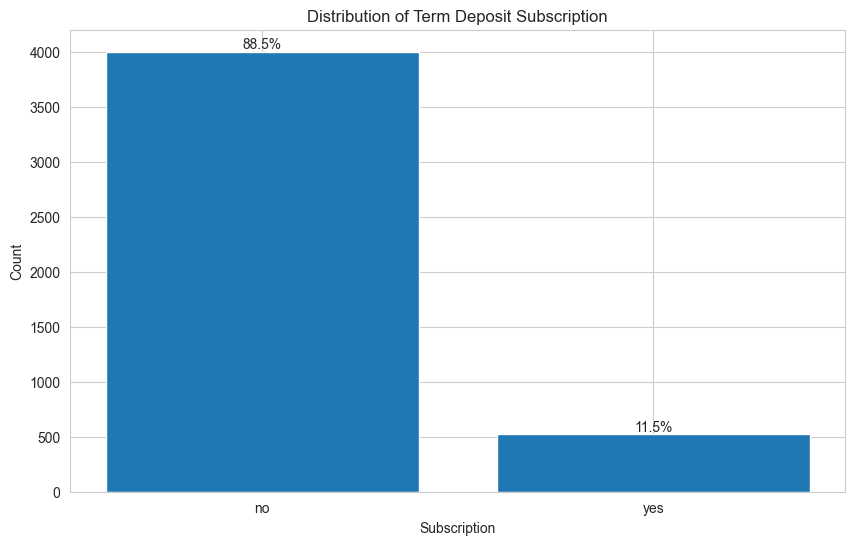


Target Variable Distribution:
y
no     88.48%
yes    11.52%
Name: proportion, dtype: object


In [15]:
def analyze_target_distribution(df: pd.DataFrame) -> None:
    """
    Analyze and visualize target variable distribution.
    
    Parameters:
        df (pd.DataFrame): Original dataset
    """
    # Get the distribution of the target variable
    target_dist = df['y'].value_counts()
    
    # Create bar plot
    plt.bar(target_dist.index, target_dist.values)
    plt.title('Distribution of Term Deposit Subscription')
    plt.xlabel('Subscription')
    plt.ylabel('Count')
    
    # Add percentage labels
    total = len(df)
    for i, v in enumerate(target_dist.values):
        percentage = (v/total) * 100
        plt.text(i, v, f'{percentage:.1f}%', ha='center', va='bottom')
    
    #Save the plot to the reports folder as a png file
    plt.savefig('../reports/figures/Task_1/target_variable_distribution.png')
    plt.show()
    plt.close()
    
    # Print summary statistics
    print("\nTarget Variable Distribution:")
    print(df['y'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

analyze_target_distribution(df)

##### 2.5.2 Distribution of the numerical Features.


Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


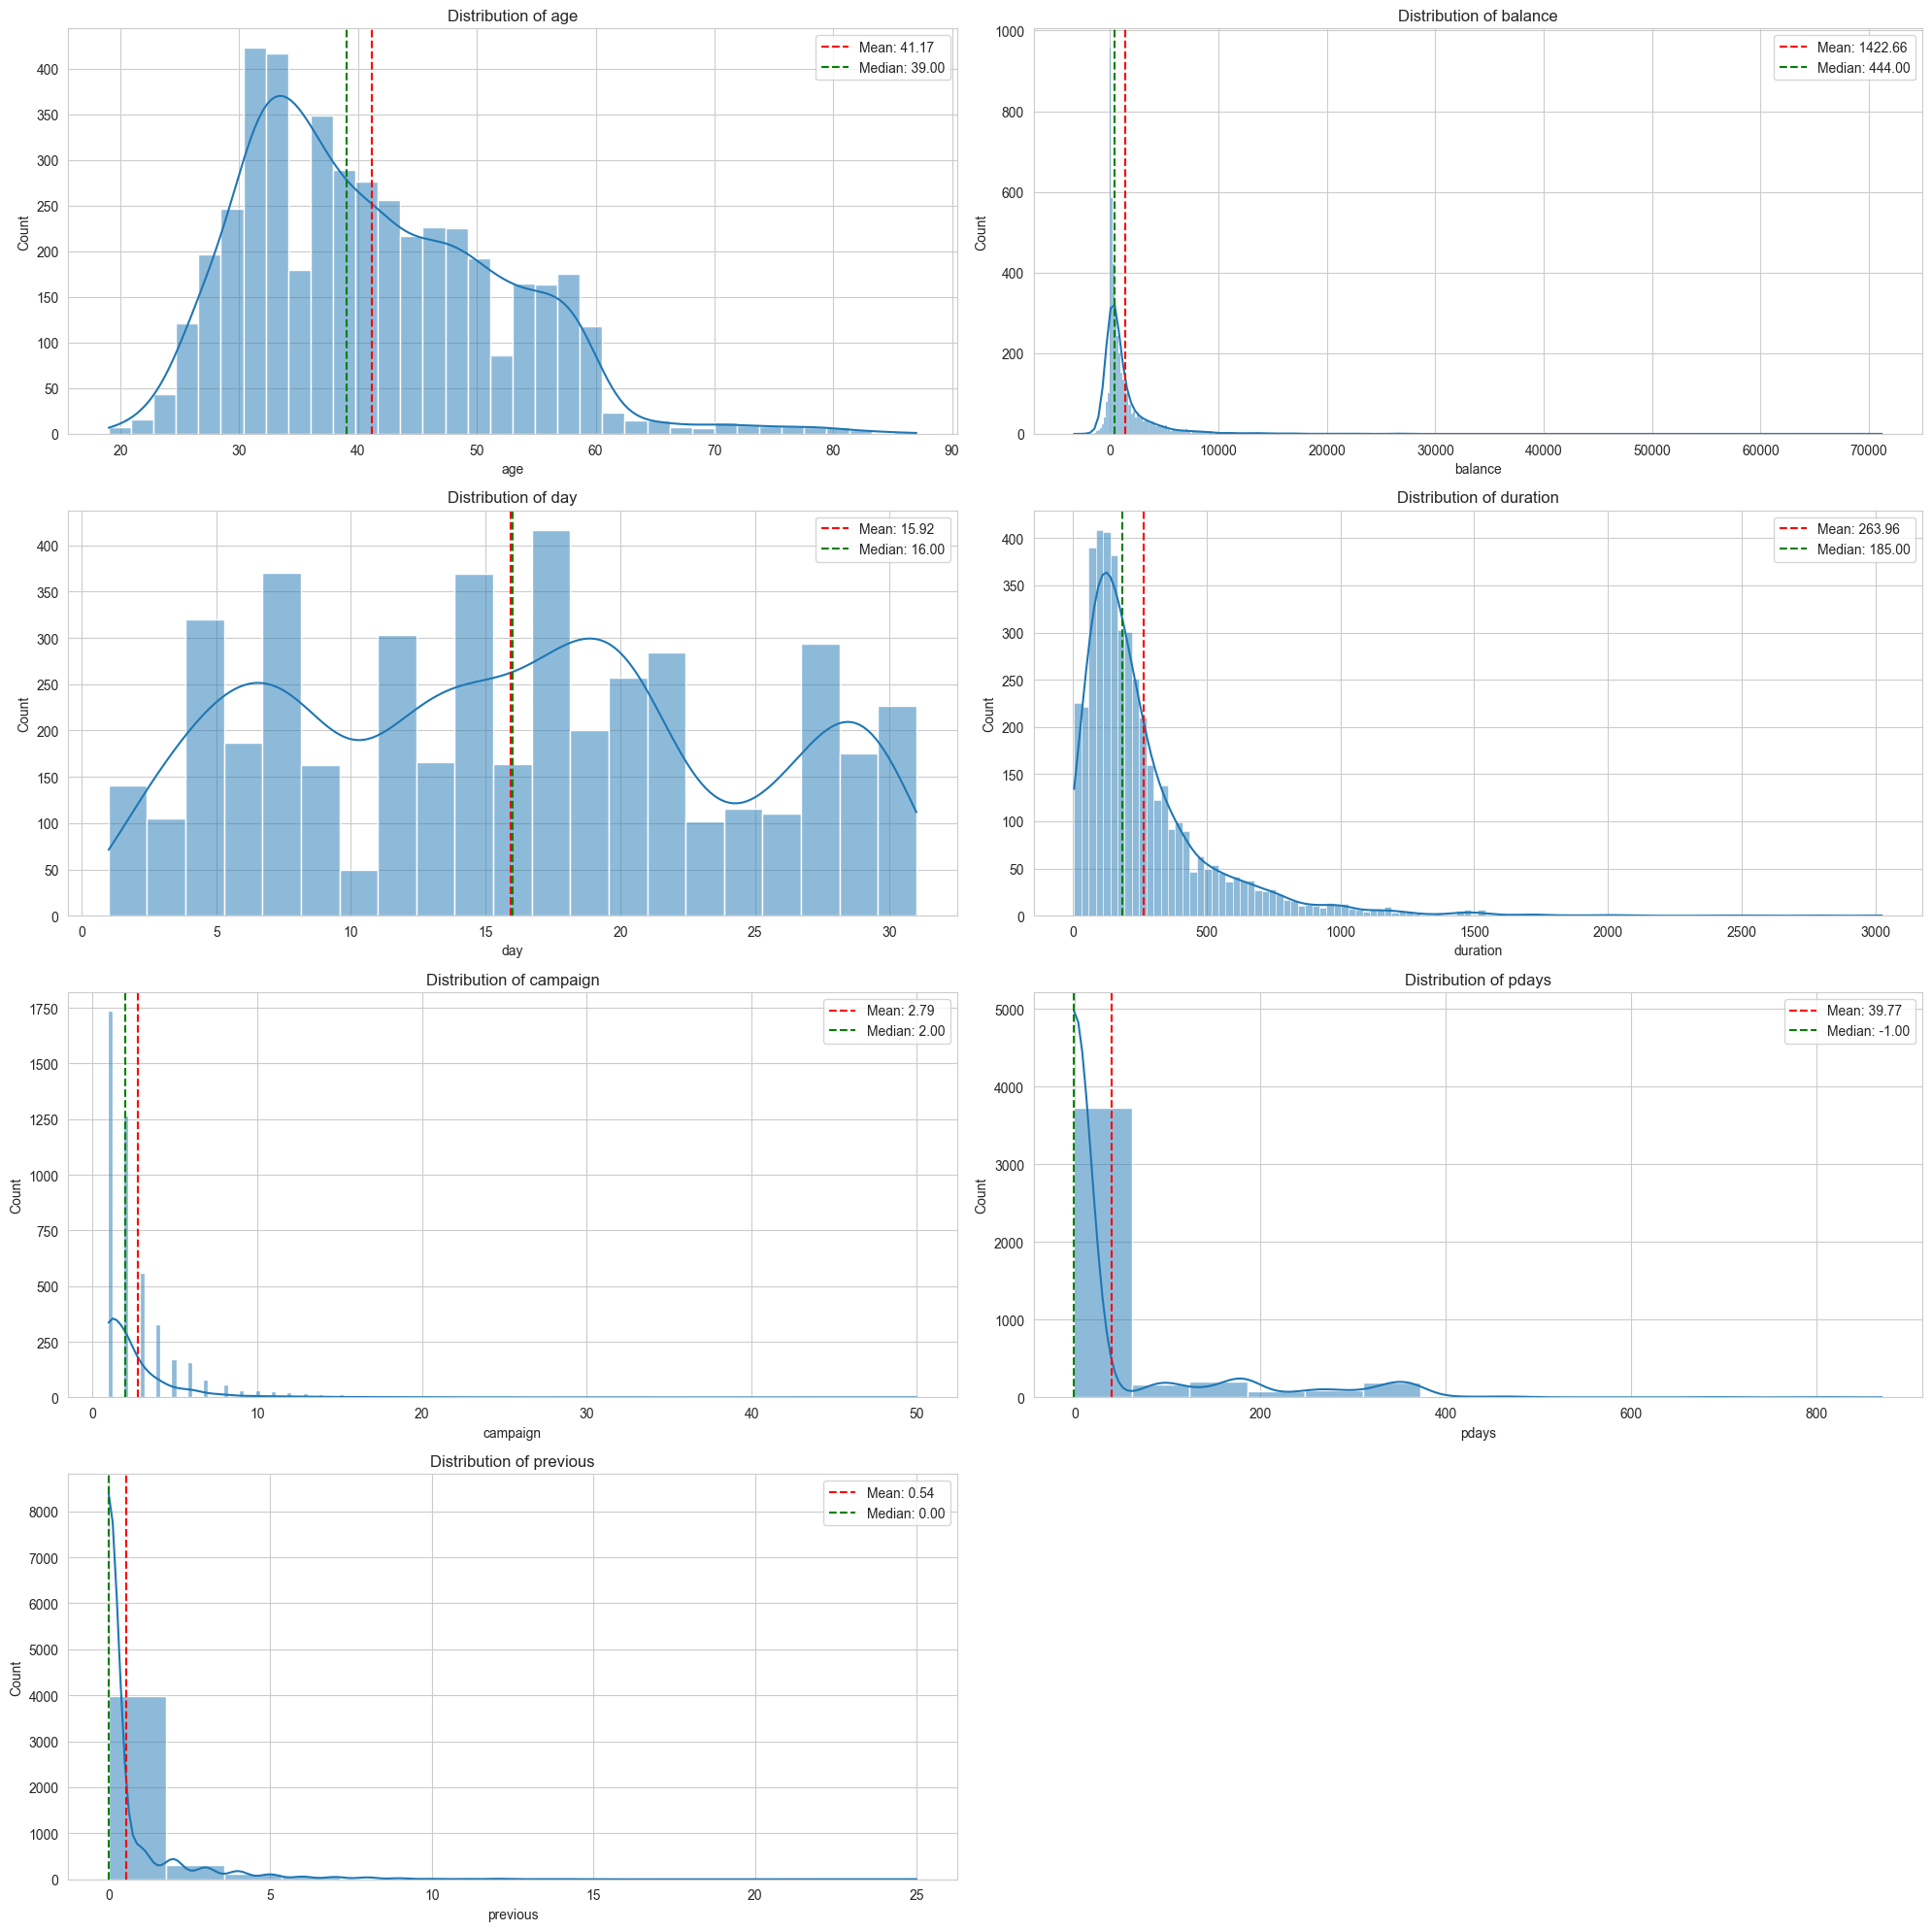


Numerical Features Summary Statistics:
               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.

In [16]:
def analyse_numerical_features(df: pd.DataFrame) -> None:
    """
    Analyse and visualise the numerical features.
    
    Parameters:
        df (pd.DataFrame): Original dataset
    """
    # Get numerical features
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    print("\nNumerical Features:", numerical_features.tolist())
    
    # Create distribution plots
    num_features = len(numerical_features)
    num_rows = (num_features + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
    axes = axes.flatten()
    
    for i, feature in enumerate(numerical_features):
        # The kde parameter is set to True to display the Kernel Density Estimation plot        
        sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        
        # Add descriptive statistics
        mean_val = df[feature].mean()
        median_val = df[feature].median()
        axes[i].axvline(mean_val, color='r', linestyle='--', 
                       label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='g', linestyle='--', 
                       label=f'Median: {median_val:.2f}')
        axes[i].legend()
    
    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout and save the plot to the reports folder as a png file
    # Warning: The close method is used to close the plot after saving it. if not closed this might cause memory leaks.
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_1/numerical_features_distribution.png')
    plt.show()
    plt.close()
    
    # Print summary statistics
    print("\nNumerical Features Summary Statistics:")
    print(df[numerical_features].describe())

analyse_numerical_features(df)

##### 2.5.3 Distribution of the numerical Features.


Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


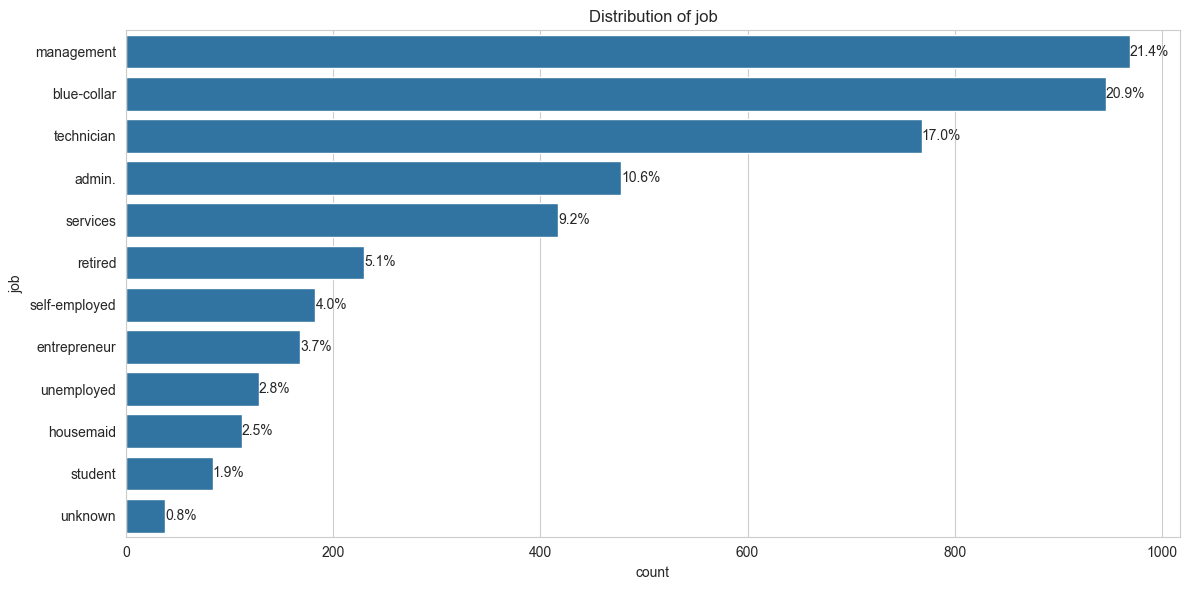


Distribution of job:
job
management       21.43%
blue-collar      20.92%
technician       16.99%
admin.           10.57%
services          9.22%
retired           5.09%
self-employed     4.05%
entrepreneur      3.72%
unemployed        2.83%
housemaid         2.48%
student           1.86%
unknown           0.84%
Name: proportion, dtype: object


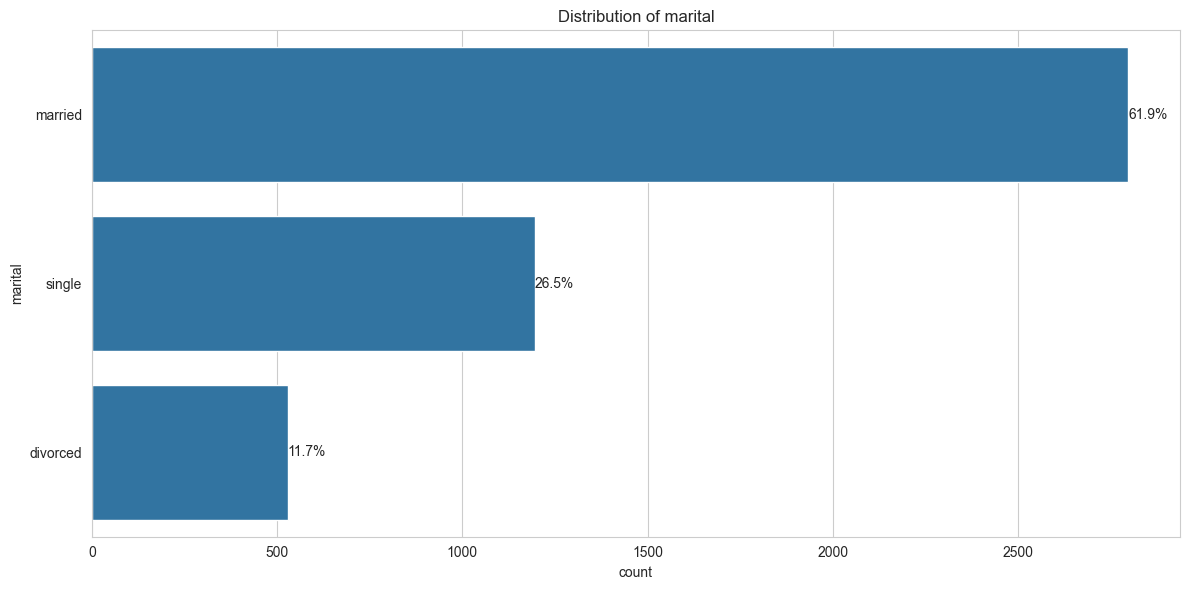


Distribution of marital:
marital
married     61.87%
single      26.45%
divorced    11.68%
Name: proportion, dtype: object


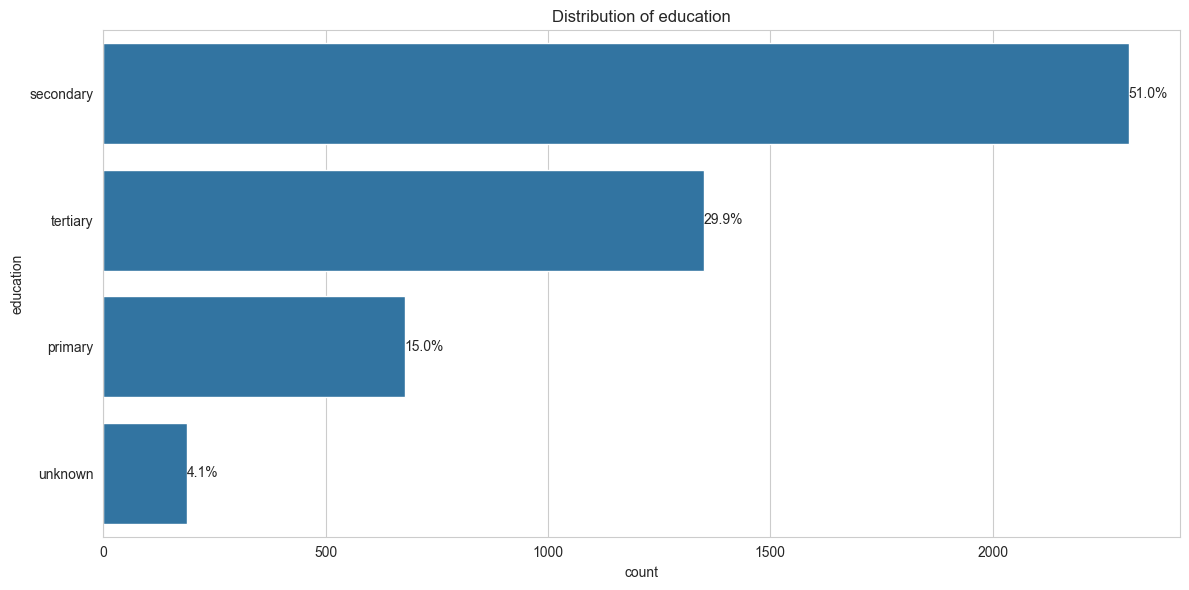


Distribution of education:
education
secondary    51.01%
tertiary     29.86%
primary       15.0%
unknown       4.14%
Name: proportion, dtype: object


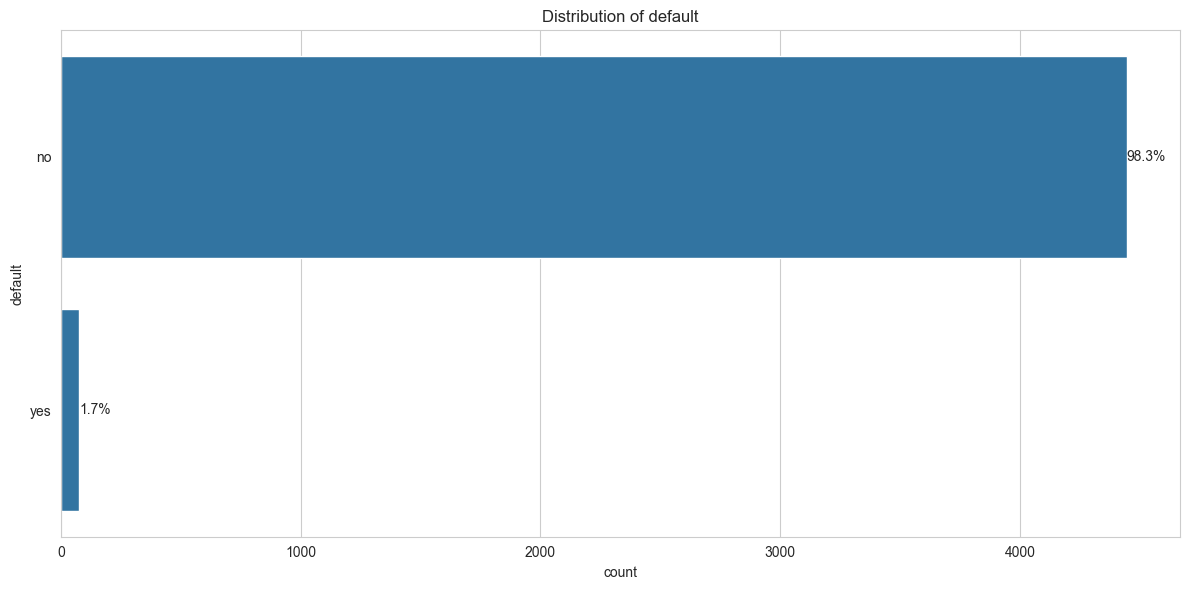


Distribution of default:
default
no     98.32%
yes     1.68%
Name: proportion, dtype: object


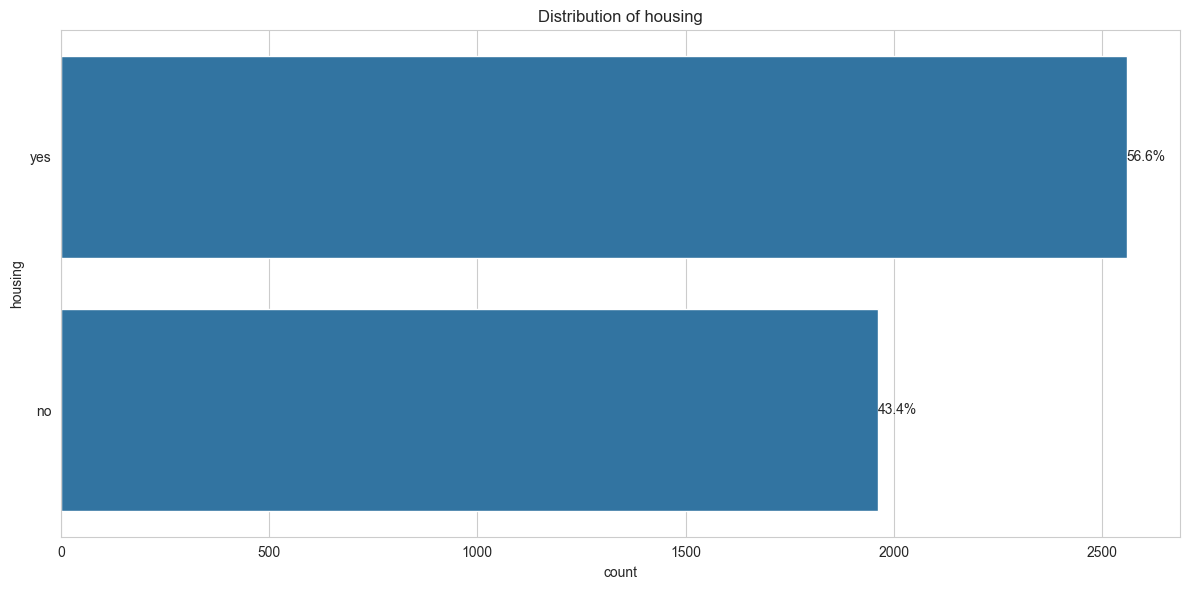


Distribution of housing:
housing
yes    56.6%
no     43.4%
Name: proportion, dtype: object


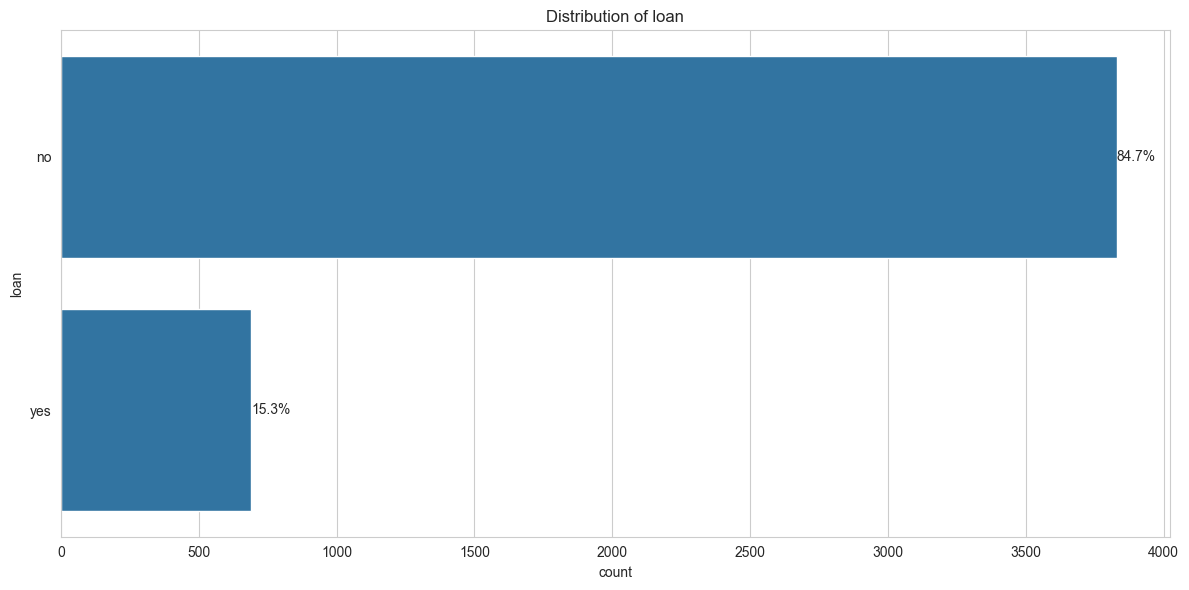


Distribution of loan:
loan
no     84.72%
yes    15.28%
Name: proportion, dtype: object


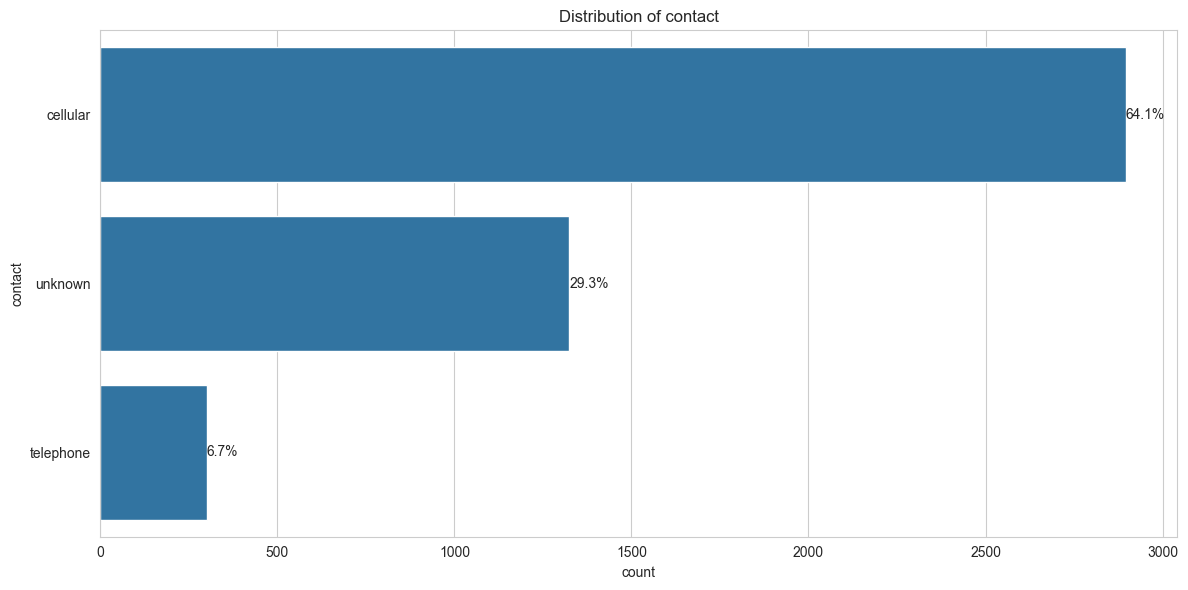


Distribution of contact:
contact
cellular     64.06%
unknown      29.29%
telephone     6.66%
Name: proportion, dtype: object


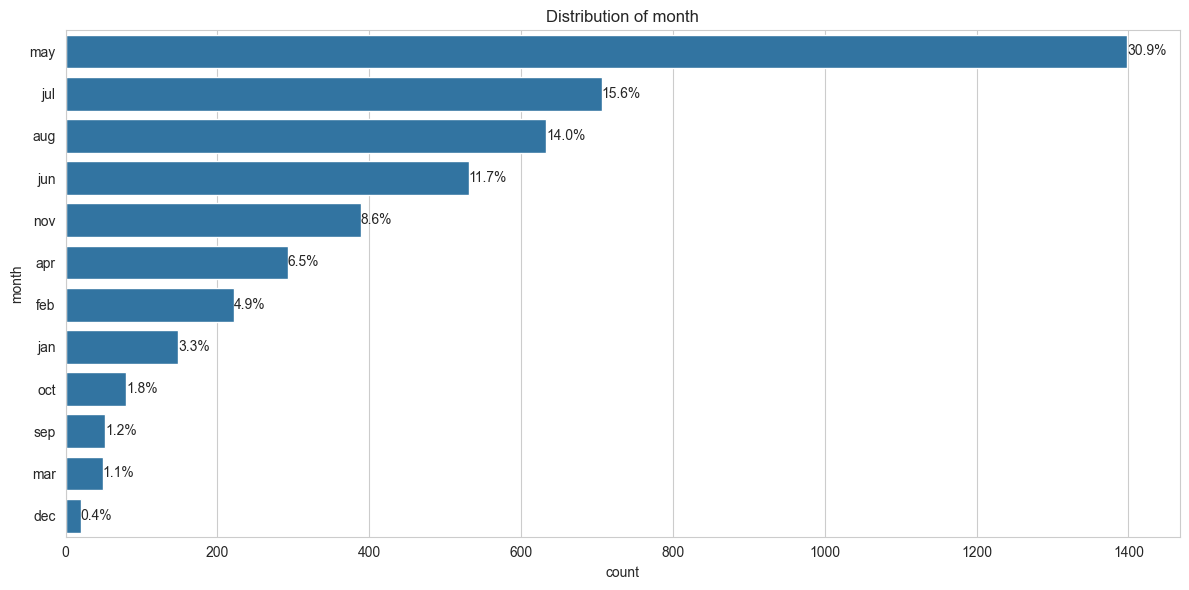


Distribution of month:
month
may    30.92%
jul    15.62%
aug     14.0%
jun    11.75%
nov      8.6%
apr     6.48%
feb     4.91%
jan     3.27%
oct     1.77%
sep     1.15%
mar     1.08%
dec     0.44%
Name: proportion, dtype: object


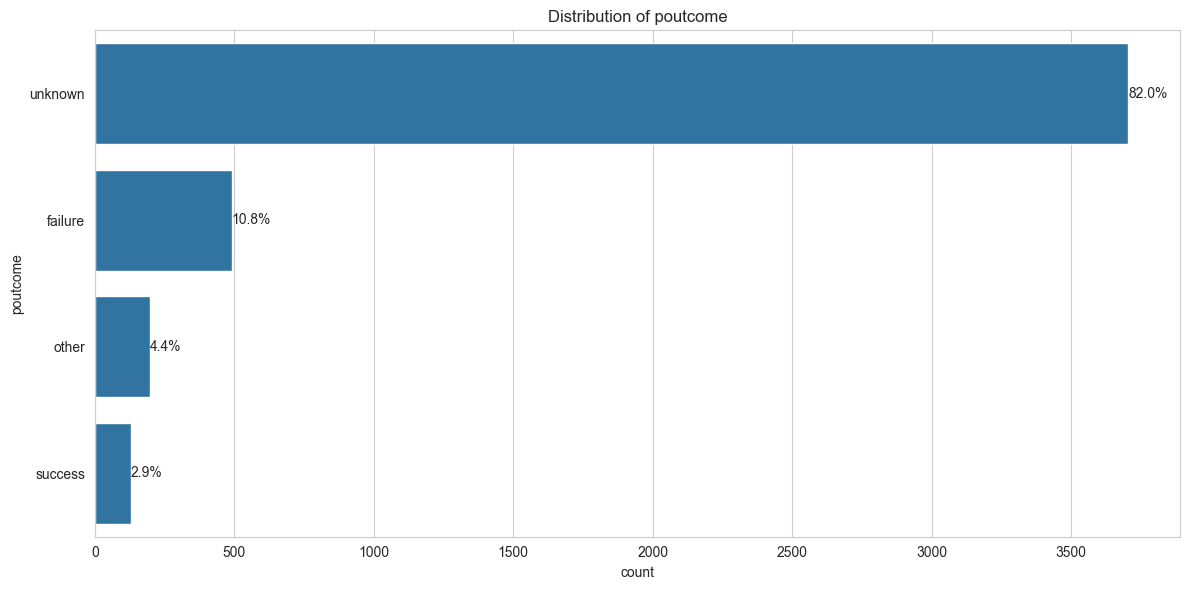


Distribution of poutcome:
poutcome
unknown    81.95%
failure    10.84%
other       4.36%
success     2.85%
Name: proportion, dtype: object


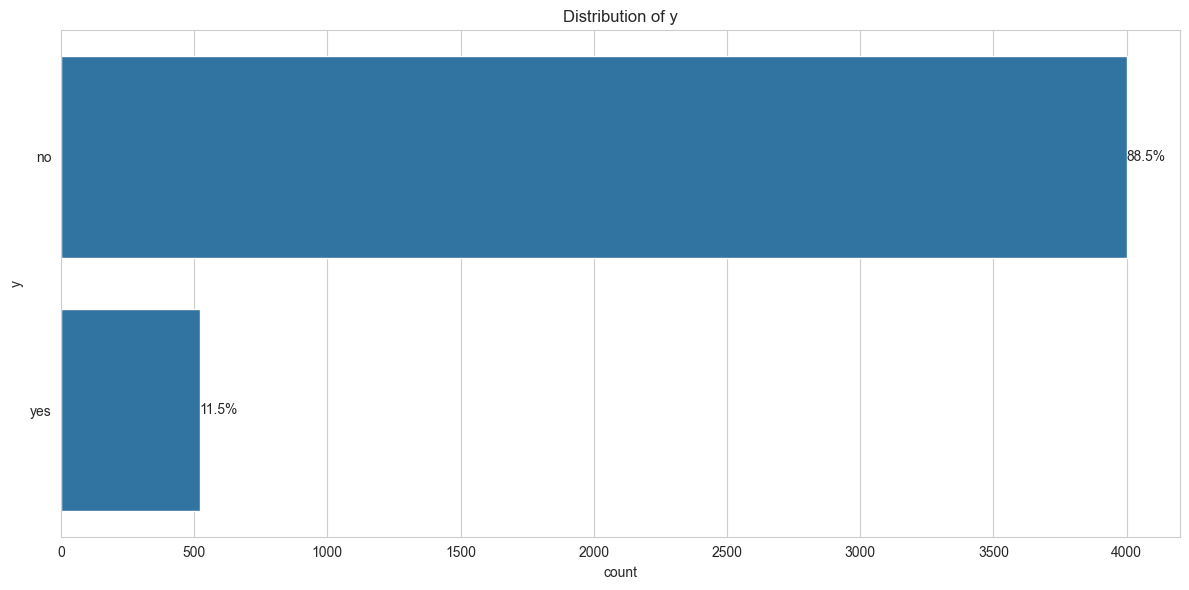


Distribution of y:
y
no     88.48%
yes    11.52%
Name: proportion, dtype: object


In [17]:
def analyse_categorical_features(df: pd.DataFrame) -> None:
    """
    Analyse and visualise the categorical features.
    
    Parameters:
        df (pd.DataFrame): Original dataset
    """
    # Get categorical features
    categorical_features = df.select_dtypes(include=['object']).columns
    print("\nCategorical Features:", categorical_features.tolist())
    
    # Create distribution plots
    for feature in categorical_features:
        plt.figure(figsize=(12, 6))
        
        # Create count plot
        sns.countplot(y=df[feature], order=df[feature].value_counts().index)
        plt.title(f'Distribution of {feature}')
        
        # Add percentage labels
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_width()/total
            plt.gca().annotate(f'{percentage:.1f}%', 
                             (p.get_width(), p.get_y()+p.get_height()/2),
                             ha='left', va='center')
        
        # Save the plot to the reports folder as a png file
        # The use of f-string to dynamically name the file and save individual plots for each categorical feature.
        plt.tight_layout()
        plt.savefig(f'../reports/figures/Task_1/categorical_{feature}_distribution.png')
        plt.show()
        plt.close()
        
        # Print value counts and percentages
        print(f"\nDistribution of {feature}:")
        print(df[feature].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

analyse_categorical_features(df)

##### 2.5.4 Correlation Matrix for numerical features.

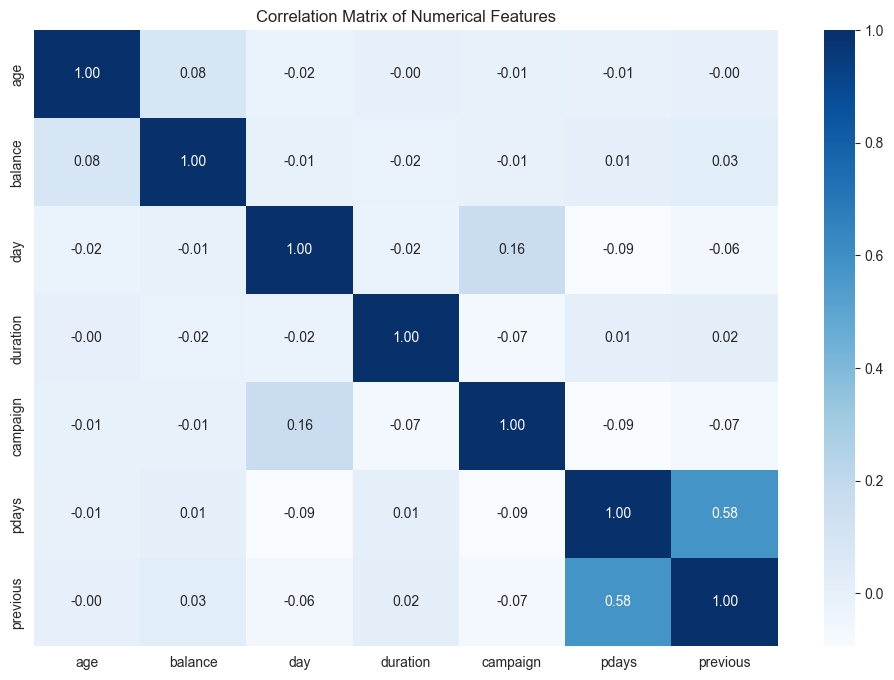


Strong Correlations (|correlation| > 0.5):
previous - pdays: 0.58


In [18]:
def analyse_correlations(df: pd.DataFrame) -> None:
    """
    Analyse and visualize the correlations between numerical features.
    This function will display a heatmap of the correlation matrix and print strong correlations.
    
    Parameters:
        df (pd.DataFrame): Original dataset
    """
    # Numerical correlations
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    correlation_matrix = df[numerical_features].corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features')
    plt.savefig('../reports/figures/Task_1/correlation_matrix.png')
    plt.show()
    plt.close()
    
    # Print strong correlations
    print("\nStrong Correlations (|correlation| > 0.5):") # 0.5 is the midpoint of the correlation scale since it ranges from -1 to 1.
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                strong_corr.append(f"{correlation_matrix.columns[i]} - "
                                 f"{correlation_matrix.columns[j]}: "
                                 f"{correlation_matrix.iloc[i, j]:.2f}")
    for corr in strong_corr:
        print(corr)

analyse_correlations(df)

### 3. Data Preparation

- Handle categorical variables
- Feature scaling
- Organize data for modeling

##### 3.1 Orginise features  types.

In [19]:
def identify_feature_types(df: pd.DataFrame) -> Dict[str, list]:
    """
    Identify and categorize features by type.
    
    Args:
        df: Input DataFrame
    Returns:
        Dictionary with feature types
    """
    feature_types = {
        'binary_features': ['default', 'housing', 'loan'],
        'categorical_features': ['job', 'marital', 'education', 
                               'contact', 'month', 'poutcome'],
        'numerical_features': ['age', 'balance', 'day', 'duration', 
                             'campaign', 'pdays', 'previous']
    }
    
    print("Feature Categories:")
    for category, features in feature_types.items():
        print(f"\n{category}:")
        for feature in features:
            print(f"- {feature}")
            
    return feature_types

feature_types = identify_feature_types(df)

Feature Categories:

binary_features:
- default
- housing
- loan

categorical_features:
- job
- marital
- education
- contact
- month
- poutcome

numerical_features:
- age
- balance
- day
- duration
- campaign
- pdays
- previous


##### 3.2 Binary Feature Processing

In [20]:
def process_binary_features(df: pd.DataFrame, 
                          binary_features: list) -> pd.DataFrame:
    """
    Process binary categorical features using LabelEncoder.
    
    Args:
        df: Input DataFrame
        binary_features: List of binary feature names
    Returns:
        DataFrame with encoded binary features
    """
    df_processed = df.copy()
    encoder = LabelEncoder()
    
    for feature in binary_features:
        df_processed[feature] = encoder.fit_transform(df_processed[feature])
        print(f"\nEncoded {feature}:")
        print(f"Original values: {df[feature].unique()}")
        print(f"Encoded values: {df_processed[feature].unique()}")
        
    return df_processed

df_binary = process_binary_features(df, feature_types['binary_features'])


Encoded default:
Original values: ['no' 'yes']
Encoded values: [0 1]

Encoded housing:
Original values: ['no' 'yes']
Encoded values: [0 1]

Encoded loan:
Original values: ['no' 'yes']
Encoded values: [0 1]


##### 3.3 Categorical Feature Processing.

In [21]:
def process_categorical_features(df: pd.DataFrame, 
                               categorical_features: list) -> pd.DataFrame:
    """
    Process multi-class categorical features using one-hot encoding.
    
    Args:
        df: Input DataFrame
        categorical_features: List of categorical feature names
    Returns:
        DataFrame with encoded categorical features
    """
    df_categorical = pd.get_dummies(
        df[categorical_features], 
        drop_first=True,
        prefix=categorical_features
    )
    
    print("\nCategorical Encoding Summary:")
    for feature in categorical_features:
        original_values = df[feature].nunique()
        encoded_columns = sum(1 for col in df_categorical if col.startswith(feature))
        print(f"\n{feature}:")
        print(f"Original categories: {original_values}")
        print(f"Encoded columns: {encoded_columns}")
        
    return df_categorical

df_categorical = process_categorical_features(
    df, 
    feature_types['categorical_features']
)


Categorical Encoding Summary:

job:
Original categories: 12
Encoded columns: 11

marital:
Original categories: 3
Encoded columns: 2

education:
Original categories: 4
Encoded columns: 3

contact:
Original categories: 3
Encoded columns: 2

month:
Original categories: 12
Encoded columns: 11

poutcome:
Original categories: 4
Encoded columns: 3


##### 3.4 Numerical Feature Processing

In [22]:
def process_numerical_features(df: pd.DataFrame, 
                             numerical_features: list) -> Tuple[pd.DataFrame, StandardScaler]:
    """
    Scale numerical features using StandardScaler.
    
    Args:
        df: Input DataFrame
        numerical_features: List of numerical feature names
    Returns:
        Tuple of (scaled DataFrame, fitted scaler)
    """
    scaler = StandardScaler()
    
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df[numerical_features]),
        columns=numerical_features,
        index=df.index
    )
    
    print("\nNumerical Scaling Summary:")
    for feature in numerical_features:
        print(f"\n{feature}:")
        print(f"Original - mean: {df[feature].mean():.3f}, std: {df[feature].std():.3f}")
        print(f"Scaled - mean: {df_scaled[feature].mean():.3f}, std: {df_scaled[feature].std():.3f}")
    
    return df_scaled, scaler

df_numerical, scaler = process_numerical_features(
    df, 
    feature_types['numerical_features']
)


Numerical Scaling Summary:

age:
Original - mean: 41.170, std: 10.576
Scaled - mean: -0.000, std: 1.000

balance:
Original - mean: 1422.658, std: 3009.638
Scaled - mean: -0.000, std: 1.000

day:
Original - mean: 15.915, std: 8.248
Scaled - mean: 0.000, std: 1.000

duration:
Original - mean: 263.961, std: 259.857
Scaled - mean: -0.000, std: 1.000

campaign:
Original - mean: 2.794, std: 3.110
Scaled - mean: -0.000, std: 1.000

pdays:
Original - mean: 39.767, std: 100.121
Scaled - mean: -0.000, std: 1.000

previous:
Original - mean: 0.543, std: 1.694
Scaled - mean: 0.000, std: 1.000


##### 3.5 Concatenate Process  Features

In [23]:
def combine_features(df_binary: pd.DataFrame,
                    df_categorical: pd.DataFrame,
                    df_numerical: pd.DataFrame,
                    target_series: pd.Series) -> Tuple[pd.DataFrame, pd.Series]:
    """
    Combine all processed features into final dataset.
    
    Args:
        df_binary: Processed binary features
        df_categorical: Processed categorical features
        df_numerical: Processed numerical features
        target_series: Target variable
    Returns:
        Tuple of (features DataFrame, target Series)
    """
    X = pd.concat([df_binary, df_categorical, df_numerical], axis=1)
    y = target_series
    
    print("\nFinal Dataset Summary:")
    print(f"Total features: {X.shape[1]}")
    print(f"Binary features: {df_binary.shape[1]}")
    print(f"Categorical features: {df_categorical.shape[1]}")
    print(f"Numerical features: {df_numerical.shape[1]}")
    
    return X, y

X, y = combine_features(
    df_binary[feature_types['binary_features']],
    df_categorical,
    df_numerical,
    df['y']
)


Final Dataset Summary:
Total features: 42
Binary features: 3
Categorical features: 32
Numerical features: 7


##### 3.6 Handle Class Imbalance

In [24]:
def apply_resampling_techniques(X: pd.DataFrame, 
                              y: pd.Series) -> Dict[str, Tuple[pd.DataFrame, pd.Series]]:
    """
    Apply SMOTE and SMOTEENN resampling techniques with proper target encoding.
    
    Args:
        X: Feature DataFrame
        y: Target Series with 'yes'/'no' values
    Returns:
        Dictionary containing original and resampled datasets with encoded targets
    """
    # First encode target variable (yes/no -> 1/0)
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    print("Target encoding mapping:", 
          dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
    
    # Apply SMOTE on encoded target
    smote = SMOTE(random_state=26)
    X_smote, y_smote = smote.fit_resample(X, y_encoded)
    
    # Apply SMOTEENN on encoded target
    smoteenn = SMOTEENN(random_state=26)
    X_smoteenn, y_smoteenn = smoteenn.fit_resample(X, y_encoded)
    
    # Store results
    resampled_data = {
        'original': (X, y_encoded),
        'smote': (X_smote, y_smote),
        'smoteenn': (X_smoteenn, y_smoteenn)
    }
    
    # Print summary
    print("\nClass Distribution Summary:")
    for name, (X_resampled, y_resampled) in resampled_data.items():
        print(f"\n{name.upper()}:")
        print(f"Shape: {X_resampled.shape}")
        print("Class distribution:")
        print(pd.Series(y_resampled).value_counts())
    
    return resampled_data

# Re-run resampling with proper encoding
resampled_datasets = apply_resampling_techniques(X, y)

Target encoding mapping: {'no': 0, 'yes': 1}

Class Distribution Summary:

ORIGINAL:
Shape: (4521, 42)
Class distribution:
0    4000
1     521
Name: count, dtype: int64

SMOTE:
Shape: (8000, 42)
Class distribution:
0    4000
1    4000
Name: count, dtype: int64

SMOTEENN:
Shape: (7061, 42)
Class distribution:
1    3956
0    3105
Name: count, dtype: int64


##### 3.7 Save Processed Data

In [ ]:
def save_processed_data(datasets: Dict, 
                       feature_info: Dict,
                       base_path: str = '../data/processed/Task_1_processed/') -> None:
    """
    Save processed datasets and feature information.
    
    Args:
        datasets: Dictionary containing processed datasets
        feature_info: Dictionary containing feature information
        base_path: Path for saving files
    """
    
    # Save datasets
    for name, (X, y) in datasets.items():
        X.to_csv(f"{base_path}{name}_features.csv", index=False)
        pd.Series(y).to_csv(f"{base_path}{name}_target.csv", index=False)
    
    # Save feature information
    with open(f"{base_path}feature_info.json", "w") as f:
        json.dump(feature_info, f, indent=4)
    
    print("\nSaved processed datasets and feature information:")
    print(f"Location: {base_path}")
    for name in datasets.keys():
        print(f"- {name} dataset")
    print("- Feature information")

save_processed_data(resampled_datasets, feature_types)


Saved processed datasets and feature information:
Location: ../data/processed/Task_1_processed/
- original dataset
- smote dataset
- smoteenn dataset
- Feature information


### 4 Modelling

##### 4.1 Load the processed dataset for modelling

In [39]:
def load_processed_datasets() -> Dict[str, Tuple[pd.DataFrame, pd.Series]]:
    """
    Load both SMOTE and SMOTEENN processed datasets.
    
    Returns:
        Dictionary containing both processed datasets
    """
    datasets = {}
    for dataset_name in ['smote', 'smoteenn']:
        base_path = '../data/processed/Task_1_processed/'
        X = pd.read_csv(f"{base_path}{dataset_name}_features.csv")
        y = pd.read_csv(f"{base_path}{dataset_name}_target.csv")['0']
        datasets[dataset_name] = (X, y)
        print(f"\nLoaded {dataset_name.upper()} dataset:")
        print(f"X shape: {X.shape}")
        print(f"y distribution:\n{y.value_counts()}")
    
    return datasets


In [40]:
# Load both datasets
processed_datasets = load_processed_datasets()


Loaded SMOTE dataset:
X shape: (8000, 42)
y distribution:
0
0    4000
1    4000
Name: count, dtype: int64

Loaded SMOTEENN dataset:
X shape: (7061, 42)
y distribution:
0
1    3956
0    3105
Name: count, dtype: int64


##### 4.2 Model Configuration
Define the models and their parameter grids for tuning

In [41]:
def create_model_configs() -> Dict[str, Dict[str, Any]]:
    """
    Create configuration dictionary for the two classification models.
    
    Returns:
        Dict containing model configurations and parameters
    """
    configs = {
        'logistic_regression': {
            'model': LogisticRegression(random_state=26),
            'params': {
                'C': [0.1, 1.0, 10.0],
                'class_weight': ['balanced', None],
                'solver': ['lbfgs', 'liblinear'],
                'max_iter': [1000]
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(random_state=26),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5],
                'class_weight': ['balanced', 'balanced_subsample']
            }
        }
    }
    
    print("Model Configurations:")
    for name, config in configs.items():
        print(f"\n{name.upper()}:")
        for param, values in config['params'].items():
            print(f"  {param}: {values}")
    
    return configs

# Create model configurations
model_configs = create_model_configs()

Model Configurations:

LOGISTIC_REGRESSION:
  C: [0.1, 1.0, 10.0]
  class_weight: ['balanced', None]
  solver: ['lbfgs', 'liblinear']
  max_iter: [1000]

RANDOM_FOREST:
  n_estimators: [100, 200]
  max_depth: [10, 20, None]
  min_samples_split: [2, 5]
  class_weight: ['balanced', 'balanced_subsample']


##### 4.3 Baseline Model Evaluation
Evaluate base models on both datasets without hyperparameter tuning

In [43]:
def evaluate_baseline_models(
    datasets: Dict[str, Tuple[pd.DataFrame, pd.Series]],
    configs: Dict[str, Dict[str, Any]]
) -> Dict[str, Dict[str, Dict[str, float]]]:
    """
    Train and evaluate baseline models on both datasets.
    
    Args:
        datasets: Dictionary containing SMOTE and SMOTEENN datasets
        configs: Model configurations
        
    Returns:
        Nested dictionary with results for each dataset and model
    """
    results = {}
    
    for dataset_name, (X, y) in datasets.items():
        print(f"\nEvaluating {dataset_name.upper()} dataset:")
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=26, stratify=y
        )
        
        results[dataset_name] = {}
        
        for model_name, config in configs.items():
            print(f"\nTraining {model_name.upper()}:")
            model = config['model']
            
            # Train model
            model.fit(X_train, y_train)
            
            # Predict
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1]
            
            # Calculate metrics
            results[dataset_name][model_name] = {
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred),
                'recall': recall_score(y_test, y_pred),
                'f1': f1_score(y_test, y_pred),
                'roc_auc': auc(
                    *roc_curve(y_test, y_prob)[:2]
                )
            }
            
            # Print results
            for metric, value in results[dataset_name][model_name].items():
                print(f"{metric}: {value:.3f}")
    
    return results

# Evaluate baseline models on both datasets
baseline_results = evaluate_baseline_models(processed_datasets, model_configs)


Evaluating SMOTE dataset:

Training LOGISTIC_REGRESSION:
accuracy: 0.894
precision: 0.904
recall: 0.882
f1: 0.893
roc_auc: 0.952

Training RANDOM_FOREST:
accuracy: 0.955
precision: 0.940
recall: 0.973
f1: 0.956
roc_auc: 0.994

Evaluating SMOTEENN dataset:

Training LOGISTIC_REGRESSION:
accuracy: 0.924
precision: 0.944
recall: 0.918
f1: 0.931
roc_auc: 0.977

Training RANDOM_FOREST:
accuracy: 0.973
precision: 0.968
recall: 0.985
f1: 0.976
roc_auc: 0.997


##### 4.4 Cross-validation Analysis
Perform cross-validation to get more robust performance estimates

In [49]:
def perform_cross_validation(
    datasets: Dict[str, Tuple[pd.DataFrame, pd.Series]],
    configs: Dict[str, Dict[str, Any]],
    cv: int = 5
) -> Dict[str, Dict[str, Dict[str, List[float]]]]:
    """
    Perform cross-validation for all models on both datasets.
    
    Args:
        datasets: Dictionary containing SMOTE and SMOTEENN datasets
        configs: Model configurations
        cv: Number of cross-validation folds
        
    Returns:
        Nested dictionary with CV results for each dataset and model
    """
    cv_results = {}
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    
    for dataset_name, (X, y) in datasets.items():
        print(f"\nCross-validation on {dataset_name.upper()} dataset:")
        cv_results[dataset_name] = {}
        
        for model_name, config in configs.items():
            print(f"\nEvaluating {model_name.upper()}:")
            scores = cross_validate(
                config['model'],
                X, y,
                scoring=scoring,
                cv=cv,
                n_jobs=-1
            )
            
            # Store and print results
            cv_results[dataset_name][model_name] = {
                metric: scores[f'test_{metric}']
                for metric in scoring
            }
            
            # Print mean and std for each metric
            for metric in scoring:
                scores_array = cv_results[dataset_name][model_name][metric]
                print(f"{metric}: {scores_array.mean():.3f} (±{scores_array.std():.3f})")
    
    return cv_results

# Perform cross-validation
cv_results = perform_cross_validation(processed_datasets, model_configs)


Cross-validation on SMOTE dataset:

Evaluating LOGISTIC_REGRESSION:
accuracy: 0.878 (±0.053)
precision: 0.892 (±0.012)
recall: 0.858 (±0.112)
f1: 0.871 (±0.068)
roc_auc: 0.942 (±0.040)

Evaluating RANDOM_FOREST:
accuracy: 0.952 (±0.021)
precision: 0.938 (±0.008)
recall: 0.967 (±0.050)
f1: 0.952 (±0.023)
roc_auc: 0.993 (±0.008)

Cross-validation on SMOTEENN dataset:

Evaluating LOGISTIC_REGRESSION:
accuracy: 0.917 (±0.036)
precision: 0.935 (±0.009)
recall: 0.915 (±0.063)
f1: 0.924 (±0.036)
roc_auc: 0.974 (±0.020)

Evaluating RANDOM_FOREST:
accuracy: 0.971 (±0.013)
precision: 0.965 (±0.009)
recall: 0.984 (±0.021)
f1: 0.974 (±0.012)
roc_auc: 0.997 (±0.004)


##### 4.5 Hyperparameter Tuning
Perform grid search to find optimal parameters for each model

In [50]:
def hyperparameters_tunning(
    datasets: Dict[str, Tuple[pd.DataFrame, pd.Series]],
    configs: Dict[str, Dict[str, Any]]
) -> Dict[str, Dict[str, Any]]:
    """
    Perform grid search for hyperparameter tuning.
    
    Args:
        datasets: Dictionary containing SMOTE and SMOTEENN datasets
        configs: Model configurations
        
    Returns:
        Dictionary with best parameters and scores for each model
    """
    tuning_results = {}
    
    for dataset_name, (X, y) in datasets.items():
        print(f"\nTuning models on {dataset_name.upper()} dataset:")
        tuning_results[dataset_name] = {}
        
        # Split data for validation
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=26, stratify=y
        )
        
        for model_name, config in configs.items():
            print(f"\nTuning {model_name.upper()}:")
            
            # Grid search
            grid_search = GridSearchCV(
                config['model'],
                config['params'],
                cv=5,
                scoring='f1',
                n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            
            # Store results
            tuning_results[dataset_name][model_name] = {
                'best_params': grid_search.best_params_,
                'best_score': grid_search.best_score_,
                'best_model': grid_search.best_estimator_
            }
            
            # Evaluate on test set
            y_pred = grid_search.best_estimator_.predict(X_test)
            test_score = f1_score(y_test, y_pred)
            
            print(f"Best parameters: {grid_search.best_params_}")
            print(f"Best CV score: {grid_search.best_score_:.3f}")
            print(f"Test set score: {test_score:.3f}")
    
    return tuning_results

# Perform hyperparameter tuning
tuning_results = hyperparameters_tunning(processed_datasets, model_configs)


Tuning models on SMOTE dataset:

Tuning LOGISTIC_REGRESSION:
Best parameters: {'C': 10.0, 'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'liblinear'}
Best CV score: 0.883
Test set score: 0.894

Tuning RANDOM_FOREST:
Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.948
Test set score: 0.956

Tuning models on SMOTEENN dataset:

Tuning LOGISTIC_REGRESSION:
Best parameters: {'C': 10.0, 'class_weight': None, 'max_iter': 1000, 'solver': 'liblinear'}
Best CV score: 0.931
Test set score: 0.933

Tuning RANDOM_FOREST:
Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: 0.975
Test set score: 0.978


##### 4.6 Final Model Evaluation
Evaluate tuned models with advanced metrics and visualizations


Final evaluation on SMOTE dataset:

Evaluating tuned LOGISTIC_REGRESSION:

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       800
           1       0.90      0.89      0.89       800

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.89      1600
weighted avg       0.90      0.90      0.89      1600



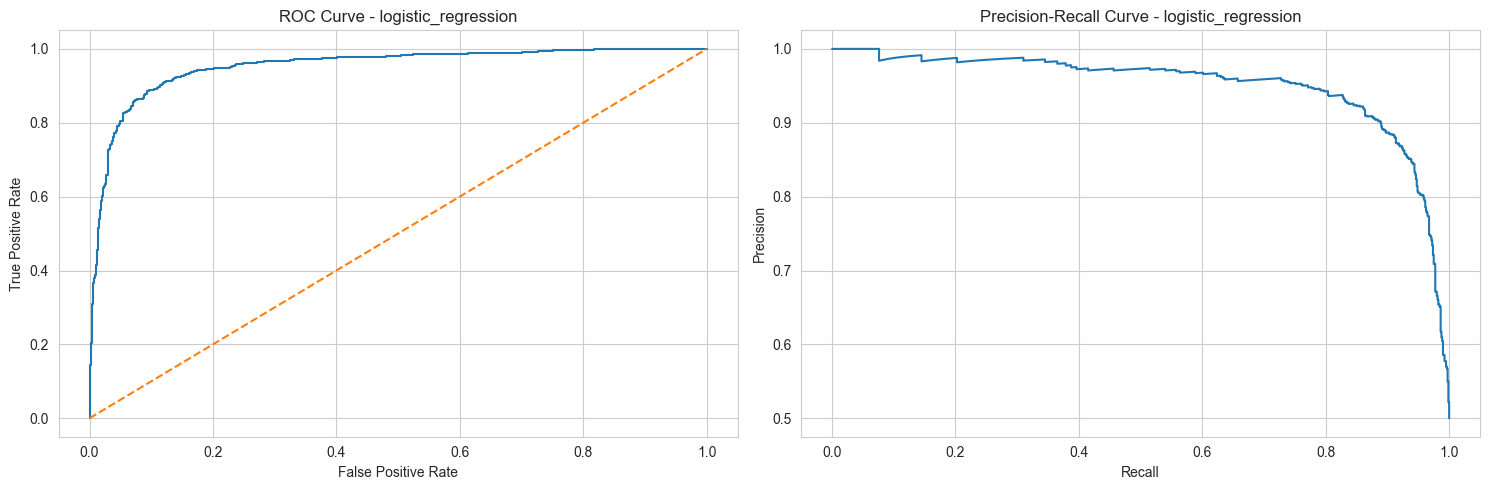


Evaluating tuned RANDOM_FOREST:

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       800
           1       0.94      0.97      0.96       800

    accuracy                           0.95      1600
   macro avg       0.96      0.96      0.95      1600
weighted avg       0.96      0.95      0.95      1600



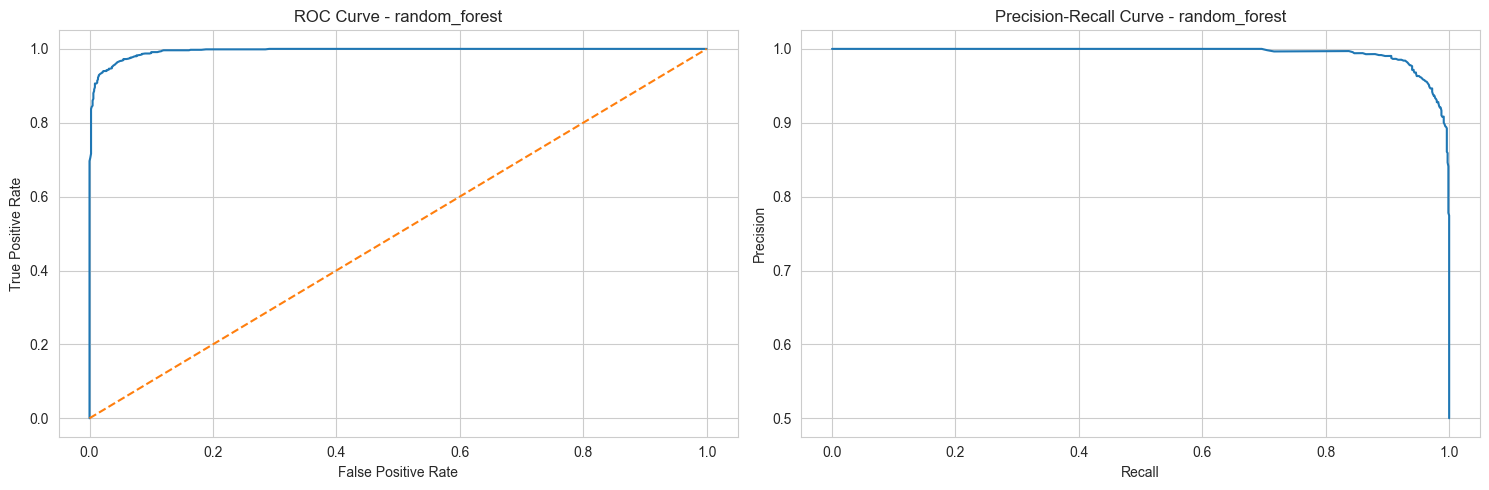


Final evaluation on SMOTEENN dataset:

Evaluating tuned LOGISTIC_REGRESSION:

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       621
           1       0.95      0.92      0.93       792

    accuracy                           0.93      1413
   macro avg       0.92      0.93      0.93      1413
weighted avg       0.93      0.93      0.93      1413



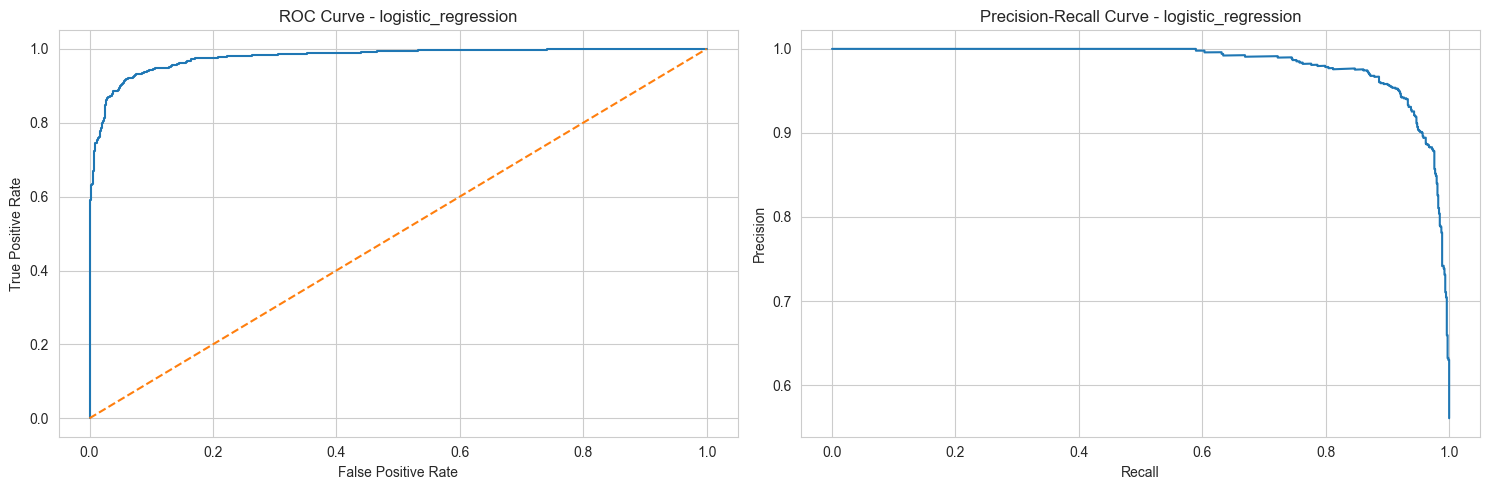


Evaluating tuned RANDOM_FOREST:

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       621
           1       0.97      0.99      0.98       792

    accuracy                           0.98      1413
   macro avg       0.98      0.97      0.97      1413
weighted avg       0.98      0.98      0.98      1413



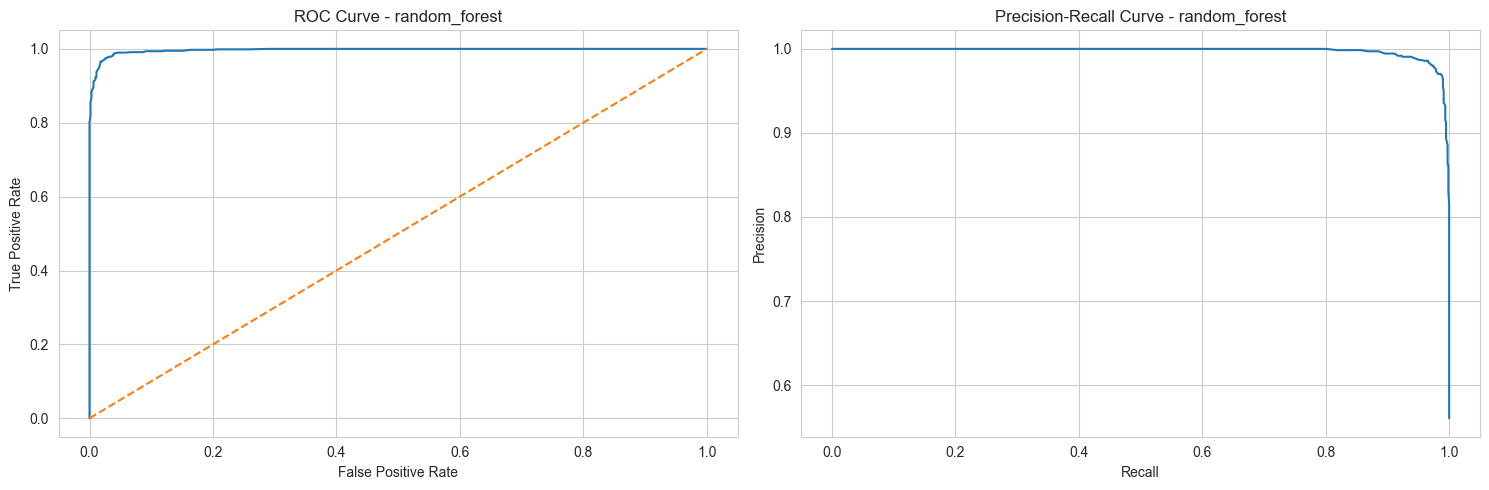

In [51]:
def evaluate_final_models(
    datasets: Dict[str, Tuple[pd.DataFrame, pd.Series]],
    tuning_results: Dict[str, Dict[str, Any]]
) -> Dict[str, Dict[str, Dict[str, Any]]]:
    """
    Perform final evaluation of tuned models with advanced metrics.
    
    Args:
        datasets: Dictionary containing SMOTE and SMOTEENN datasets
        tuning_results: Results from hyperparameter tuning
        
    Returns:
        Dictionary with detailed evaluation metrics
    """
    final_results = {}
    
    for dataset_name, (X, y) in datasets.items():
        print(f"\nFinal evaluation on {dataset_name.upper()} dataset:")
        final_results[dataset_name] = {}
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=26, stratify=y
        )
        
        for model_name in tuning_results[dataset_name].keys():
            print(f"\nEvaluating tuned {model_name.upper()}:")
            model = tuning_results[dataset_name][model_name]['best_model']
            
            # Predictions
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1]
            
            # Store results
            final_results[dataset_name][model_name] = {
                'confusion_matrix': confusion_matrix(y_test, y_pred),
                'classification_report': classification_report(y_test, y_pred),
                'roc_curve': roc_curve(y_test, y_prob),
                'pr_curve': precision_recall_curve(y_test, y_prob)
            }
            
            # Print classification report
            print("\nClassification Report:")
            print(final_results[dataset_name][model_name]['classification_report'])
            
            # Plot ROC and PR curves
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
            
            # ROC curve
            fpr, tpr, _ = final_results[dataset_name][model_name]['roc_curve']
            ax1.plot(fpr, tpr)
            ax1.plot([0, 1], [0, 1], '--')
            ax1.set_title(f'ROC Curve - {model_name}')
            ax1.set_xlabel('False Positive Rate')
            ax1.set_ylabel('True Positive Rate')
            
            # PR curve
            precision, recall, _ = final_results[dataset_name][model_name]['pr_curve']
            ax2.plot(recall, precision)
            ax2.set_title(f'Precision-Recall Curve - {model_name}')
            ax2.set_xlabel('Recall')
            ax2.set_ylabel('Precision')
            
            plt.tight_layout()
            plt.show()
    
    return final_results

# Perform final evaluation
final_results = evaluate_final_models(processed_datasets, tuning_results)

### 5. Evaluation

This section evaluates the trained models from Step 4. The evaluation focuses on:
- Comparing model performance across both SMOTE and SMOTEENN datasets
- Detailed performance metrics analysis
- Feature importance
- Business impact analysis

Steps:
5.1 Advanced Performance Metrics
5.2 Comparative Analysis
5.3 Feature Importance Analysis
5.4 Business Impact Analysis

##### 5.1 Advanced Performance Metrics
Generate comprehensive performance metrics for all models

In [52]:
def calculate_advanced_metrics(
    datasets: Dict[str, Tuple[pd.DataFrame, pd.Series]],
    tuned_models: Dict[str, Dict[str, Any]]
) -> Dict[str, Dict[str, Dict[str, Any]]]:
    """
    Calculate advanced performance metrics for tuned models.
    
    Args:
        datasets: Dictionary containing both resampled datasets
        tuned_models: Dictionary containing tuned models from step 4
        
    Returns:
        Dictionary containing detailed metrics for each model and dataset
    """
    metrics_results = {}
    
    for dataset_name, (X, y) in datasets.items():
        print(f"\nEvaluating models on {dataset_name.upper()} dataset:")
        metrics_results[dataset_name] = {}
        
        # Create fresh train/test split for final evaluation
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=26, stratify=y
        )
        
        for model_name, model_info in tuned_models[dataset_name].items():
            print(f"\nEvaluating {model_name}:")
            model = model_info['best_model']
            
            # Get predictions
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1]
            
            # Calculate metrics
            metrics_results[dataset_name][model_name] = {
                'confusion_matrix': confusion_matrix(y_test, y_pred),
                'classification_report': classification_report(y_test, y_pred, output_dict=True),
                'roc_curve': roc_curve(y_test, y_prob),
                'pr_curve': precision_recall_curve(y_test, y_prob),
                'auc_score': roc_auc_score(y_test, y_prob)
            }
            
            # Print key metrics
            print("\nConfusion Matrix:")
            print(metrics_results[dataset_name][model_name]['confusion_matrix'])
            print("\nClassification Report:")
            print(classification_report(y_test, y_pred))
            print(f"AUC Score: {metrics_results[dataset_name][model_name]['auc_score']:.3f}")
    
    return metrics_results

# Calculate advanced metrics
advanced_metrics = calculate_advanced_metrics(processed_datasets, tuning_results)


Evaluating models on SMOTE dataset:

Evaluating logistic_regression:

Confusion Matrix:
[[724  76]
 [ 92 708]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       800
           1       0.90      0.89      0.89       800

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.89      1600
weighted avg       0.90      0.90      0.89      1600

AUC Score: 0.952

Evaluating random_forest:

Confusion Matrix:
[[749  51]
 [ 21 779]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       800
           1       0.94      0.97      0.96       800

    accuracy                           0.95      1600
   macro avg       0.96      0.96      0.95      1600
weighted avg       0.96      0.95      0.95      1600

AUC Score: 0.995

Evaluating models on SMOTEENN dataset:

Evaluating logistic_regression:

Confusion

##### 5.2 Comparative Analysis
Visualize and compare model performance across datasets

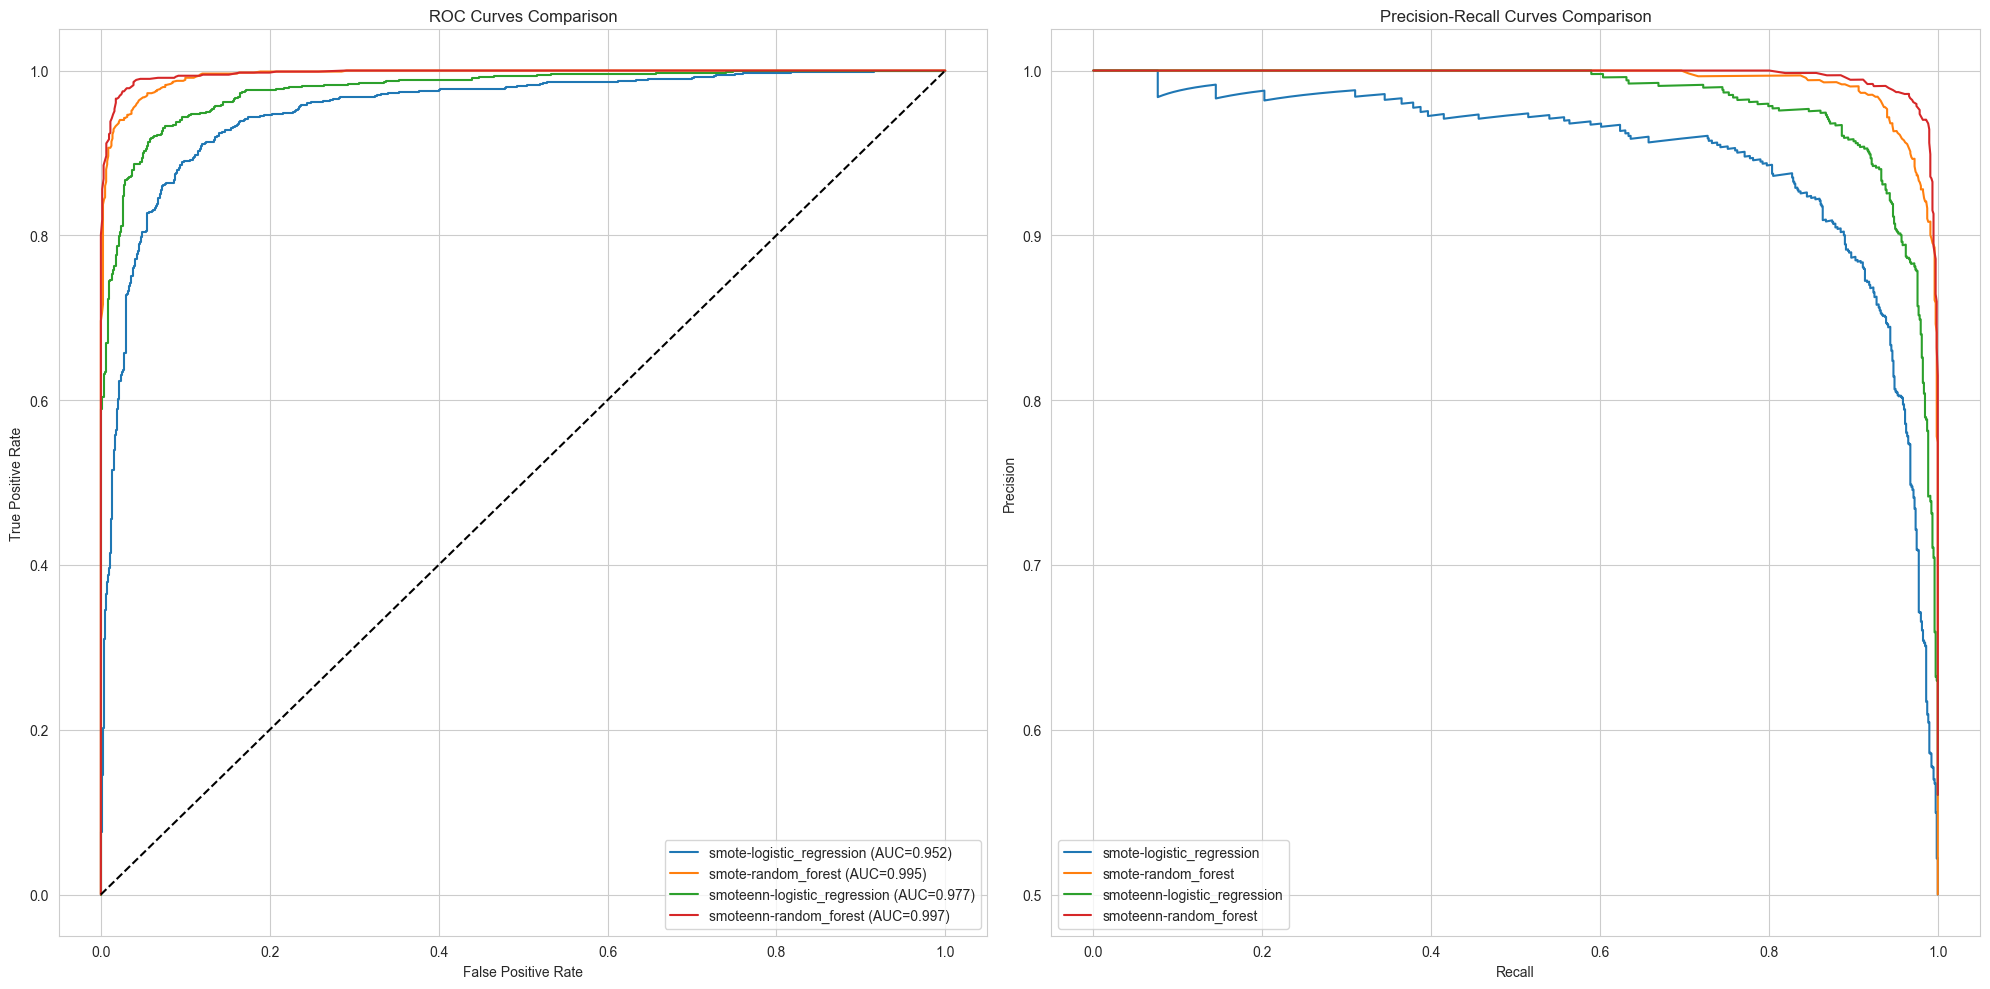


Performance Summary:
    Dataset                Model  precision  recall  f1-score    AUC
0     smote  logistic_regression      0.895   0.895     0.895  0.952
1     smote        random_forest      0.956   0.955     0.955  0.995
2  smoteenn  logistic_regression      0.927   0.926     0.927  0.977
3  smoteenn        random_forest      0.975   0.975     0.975  0.997


In [53]:
def create_comparative_visualizations(
    metrics_results: Dict[str, Dict[str, Dict[str, Any]]]
) -> None:
    """
    Create visualizations comparing model performance across datasets.
    
    Args:
        metrics_results: Results from advanced metrics calculation
    """
    # Set up the figure
    fig = plt.figure(figsize=(20, 10))
    
    # 1. ROC Curves
    ax1 = plt.subplot(121)
    for dataset_name in metrics_results.keys():
        for model_name in metrics_results[dataset_name].keys():
            metrics = metrics_results[dataset_name][model_name]
            fpr, tpr, _ = metrics['roc_curve']
            ax1.plot(fpr, tpr, 
                    label=f"{dataset_name}-{model_name} "
                          f"(AUC={metrics['auc_score']:.3f})")
    
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curves Comparison')
    ax1.legend()
    
    # 2. Precision-Recall Curves
    ax2 = plt.subplot(122)
    for dataset_name in metrics_results.keys():
        for model_name in metrics_results[dataset_name].keys():
            metrics = metrics_results[dataset_name][model_name]
            precision, recall, _ = metrics['pr_curve']
            ax2.plot(recall, precision, 
                    label=f"{dataset_name}-{model_name}")
    
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision-Recall Curves Comparison')
    ax2.legend()
    
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_1/model_comparison.png')
    plt.show()
    
    # Create performance summary table
    summary_data = []
    metrics_of_interest = ['precision', 'recall', 'f1-score']
    
    for dataset_name in metrics_results.keys():
        for model_name in metrics_results[dataset_name].keys():
            metrics = metrics_results[dataset_name][model_name]['classification_report']
            summary_data.append({
                'Dataset': dataset_name,
                'Model': model_name,
                **{metric: metrics['weighted avg'][metric] 
                   for metric in metrics_of_interest},
                'AUC': metrics_results[dataset_name][model_name]['auc_score']
            })
    
    summary_df = pd.DataFrame(summary_data)
    print("\nPerformance Summary:")
    print(summary_df.round(3))
    
    return summary_df

# Create comparative visualizations
performance_summary = create_comparative_visualizations(advanced_metrics)

##### 5.3 Feature Importance Analysis
Analyze which features have the most impact on model predictions


Feature Importance Analysis for SMOTE dataset:


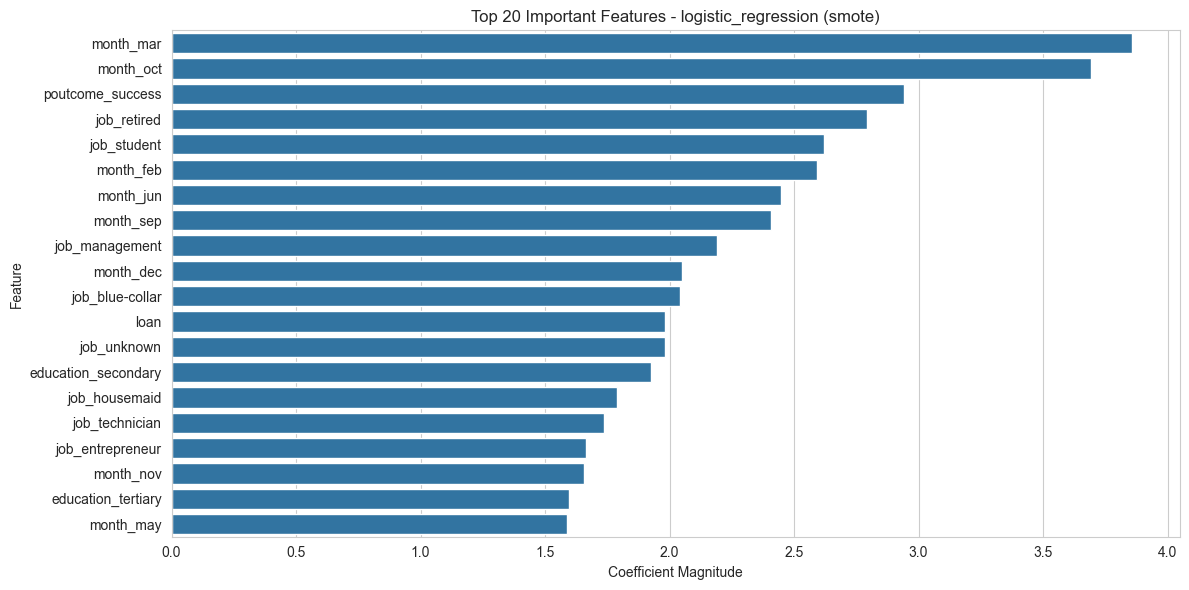


Top 10 features for logistic_regression:
             Feature  Importance
27         month_mar    3.857305
30         month_oct    3.693462
33  poutcome_success    2.942403
7        job_retired    2.793015
10       job_student    2.619272
23         month_feb    2.593330
26         month_jun    2.446522
31         month_sep    2.409452
6     job_management    2.192520
22         month_dec    2.050230


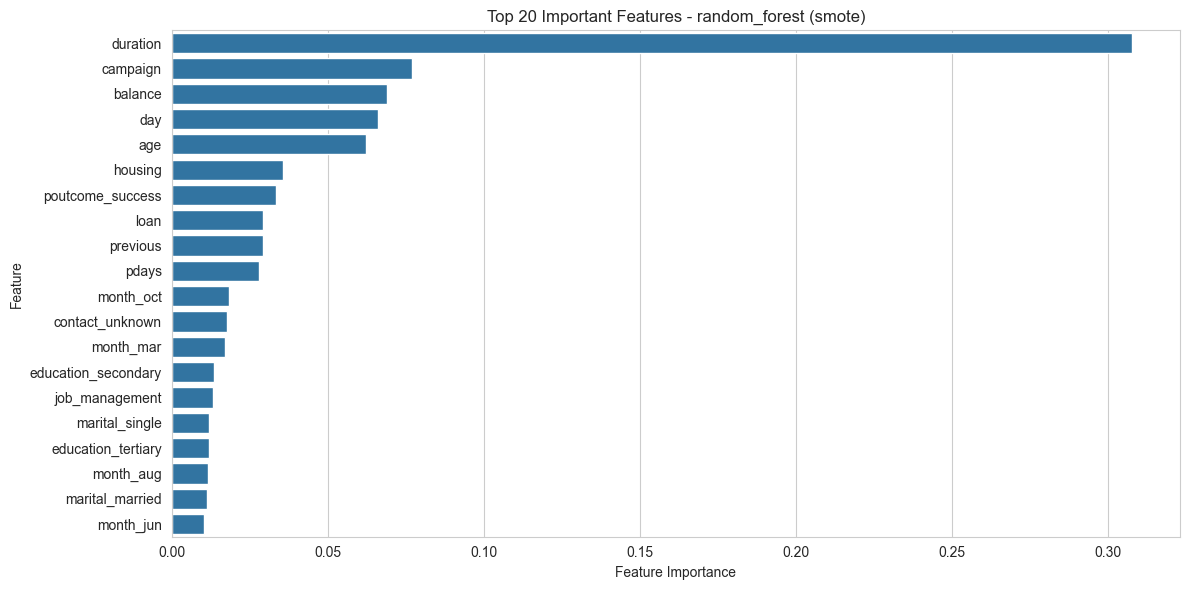


Top 10 features for random_forest:
             Feature  Importance
38          duration    0.307609
39          campaign    0.076976
36           balance    0.068963
37               day    0.066288
35               age    0.062411
1            housing    0.035861
33  poutcome_success    0.033389
2               loan    0.029299
41          previous    0.029281
40             pdays    0.028063

Feature Importance Analysis for SMOTEENN dataset:


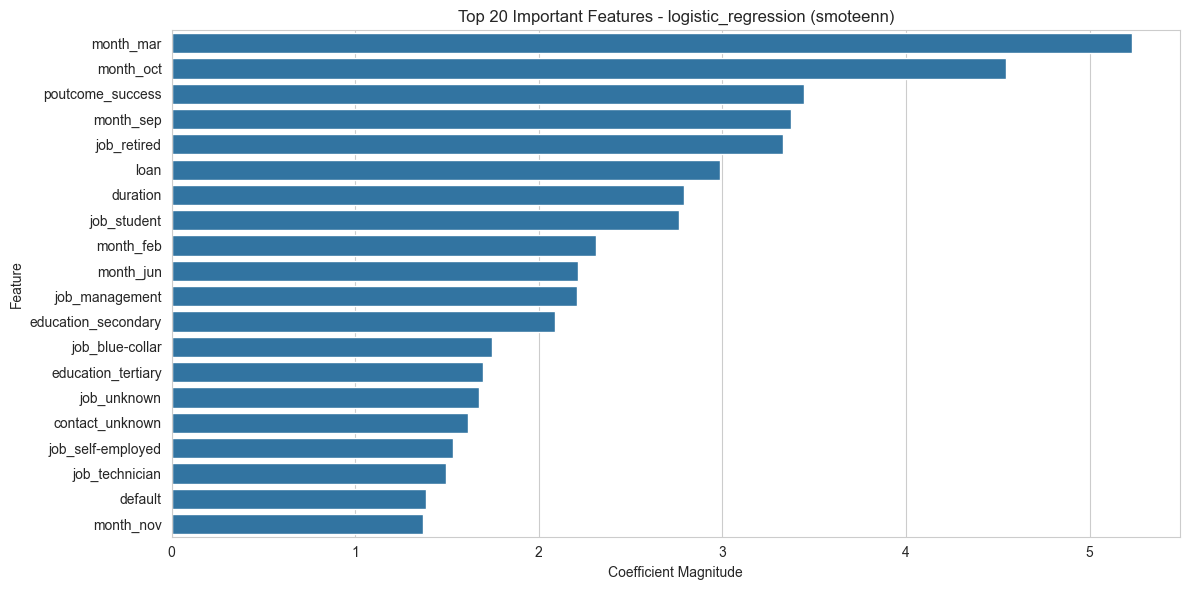


Top 10 features for logistic_regression:
             Feature  Importance
27         month_mar    5.230827
30         month_oct    4.544719
33  poutcome_success    3.445694
31         month_sep    3.376204
7        job_retired    3.328008
2               loan    2.989820
38          duration    2.793365
10       job_student    2.762620
23         month_feb    2.313903
26         month_jun    2.211409


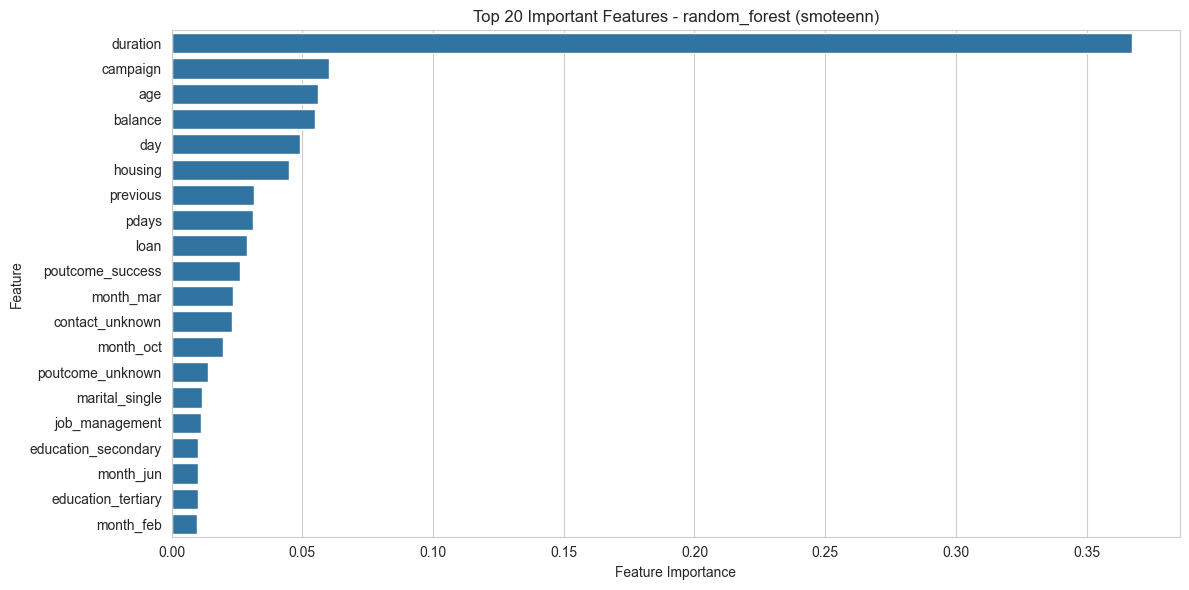


Top 10 features for random_forest:
             Feature  Importance
38          duration    0.367329
39          campaign    0.060400
35               age    0.055881
36           balance    0.055006
37               day    0.049126
1            housing    0.044774
41          previous    0.031372
40             pdays    0.031003
2               loan    0.028739
33  poutcome_success    0.026338


In [54]:
def analyze_feature_importance(
    datasets: Dict[str, Tuple[pd.DataFrame, pd.Series]],
    tuned_models: Dict[str, Dict[str, Any]]
) -> Dict[str, pd.DataFrame]:
    """
    Analyze and visualize feature importance for each model.
    
    Args:
        datasets: Dictionary containing both resampled datasets
        tuned_models: Dictionary containing tuned models
        
    Returns:
        Dictionary containing feature importance DataFrames
    """
    importance_results = {}
    
    for dataset_name, (X, y) in datasets.items():
        print(f"\nFeature Importance Analysis for {dataset_name.upper()} dataset:")
        importance_results[dataset_name] = {}
        
        for model_name, model_info in tuned_models[dataset_name].items():
            model = model_info['best_model']
            
            # Get feature importance
            if hasattr(model, 'feature_importances_'):
                # For Random Forest
                importance = model.feature_importances_
                importance_type = 'Feature Importance'
            elif hasattr(model, 'coef_'):
                # For Logistic Regression
                importance = np.abs(model.coef_[0])
                importance_type = 'Coefficient Magnitude'
            else:
                continue
                
            # Create importance DataFrame
            importance_df = pd.DataFrame({
                'Feature': X.columns,
                'Importance': importance
            }).sort_values('Importance', ascending=False)
            
            importance_results[dataset_name][model_name] = importance_df
            
            # Visualize top 20 features
            plt.figure(figsize=(12, 6))
            sns.barplot(
                data=importance_df.head(20),
                x='Importance',
                y='Feature'
            )
            plt.title(f'Top 20 Important Features - {model_name} ({dataset_name})')
            plt.xlabel(importance_type)
            plt.tight_layout()
            plt.savefig(f'../reports/figures/Task_1/feature_importance_{dataset_name}_{model_name}.png')
            plt.show()
            
            # Print top 10 features
            print(f"\nTop 10 features for {model_name}:")
            print(importance_df.head(10))
            
    return importance_results

# Analyze feature importance
feature_importance_results = analyze_feature_importance(processed_datasets, tuning_results)

##### 5.4 Business Impact Analysis
Analyze model performance in business context and provide actionable insights

In [55]:
def analyze_business_impact(
    metrics_results: Dict[str, Dict[str, Dict[str, Any]]],
    feature_importance: Dict[str, Dict[str, pd.DataFrame]]
) -> Dict[str, Any]:
    """
    Analyze model performance from a business perspective.
    
    Args:
        metrics_results: Results from advanced metrics calculation
        feature_importance: Results from feature importance analysis
        
    Returns:
        Dictionary containing business metrics and insights
    """
    business_analysis = {
        'model_comparison': {},
        'key_features': {},
        'recommendations': []
    }
    
    # 1. Model Performance Analysis
    print("\nModel Performance Analysis:")
    for dataset_name in metrics_results.keys():
        print(f"\n{dataset_name.upper()} Dataset Results:")
        
        for model_name in metrics_results[dataset_name].keys():
            metrics = metrics_results[dataset_name][model_name]
            conf_matrix = metrics['confusion_matrix']
            
            # Calculate business metrics
            total = conf_matrix.sum()
            correct_predictions = conf_matrix.diagonal().sum()
            accuracy = correct_predictions / total
            
            # For binary classification where 1 is positive class (subscription)
            true_positives = conf_matrix[1, 1]
            false_positives = conf_matrix[0, 1]
            false_negatives = conf_matrix[1, 0]
            
            # Business metrics
            success_rate = true_positives / (true_positives + false_positives)
            missed_opportunities = false_negatives / (true_positives + false_negatives)
            
            business_analysis['model_comparison'][f"{dataset_name}_{model_name}"] = {
                'accuracy': accuracy,
                'success_rate': success_rate,
                'missed_opportunities': missed_opportunities
            }
            
            print(f"\n{model_name}:")
            print(f"Success Rate (Precision): {success_rate:.3f}")
            print(f"Missed Opportunities (False Negative Rate): {missed_opportunities:.3f}")
    
    # 2. Key Features Analysis
    print("\nKey Business Drivers:")
    for dataset_name in feature_importance.keys():
        business_analysis['key_features'][dataset_name] = {}
        
        for model_name, importance_df in feature_importance[dataset_name].items():
            top_features = importance_df.head(5)['Feature'].tolist()
            business_analysis['key_features'][dataset_name][model_name] = top_features
            
            print(f"\n{dataset_name.upper()} - {model_name}:")
            print("Top 5 influential features:", top_features)
    
    # 3. Business Recommendations
    recommendations = [
        "Focus marketing efforts on segments identified by top features",
        "Optimize campaign timing based on temporal features",
        "Prioritize leads based on model predictions",
        "Adjust contact strategy based on success rates",
        "Monitor and validate model performance regularly"
    ]
    
    print("\nBusiness Recommendations:")
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")
        
    business_analysis['recommendations'] = recommendations
    
    return business_analysis

# Perform business impact analysis
business_impact = analyze_business_impact(advanced_metrics, feature_importance_results)


Model Performance Analysis:

SMOTE Dataset Results:

logistic_regression:
Success Rate (Precision): 0.903
Missed Opportunities (False Negative Rate): 0.115

random_forest:
Success Rate (Precision): 0.939
Missed Opportunities (False Negative Rate): 0.026

SMOTEENN Dataset Results:

logistic_regression:
Success Rate (Precision): 0.947
Missed Opportunities (False Negative Rate): 0.080

random_forest:
Success Rate (Precision): 0.969
Missed Opportunities (False Negative Rate): 0.013

Key Business Drivers:

SMOTE - logistic_regression:
Top 5 influential features: ['month_mar', 'month_oct', 'poutcome_success', 'job_retired', 'job_student']

SMOTE - random_forest:
Top 5 influential features: ['duration', 'campaign', 'balance', 'day', 'age']

SMOTEENN - logistic_regression:
Top 5 influential features: ['month_mar', 'month_oct', 'poutcome_success', 'month_sep', 'job_retired']

SMOTEENN - random_forest:
Top 5 influential features: ['duration', 'campaign', 'age', 'balance', 'day']

Business Recom

In [56]:
def save_evaluation_results(
    advanced_metrics: Dict,
    performance_summary: pd.DataFrame,
    feature_importance_results: Dict,
    business_impact: Dict,
    output_path: str = '../models/Task_1/'
) -> None:
    """
    Save all evaluation results to files.
    
    Args:
        advanced_metrics: Results from advanced metrics calculation
        performance_summary: Model performance summary DataFrame
        feature_importance_results: Feature importance analysis results
        business_impact: Business impact analysis results
        output_path: Path to save results
    """
    # Create results dictionary
    evaluation_results = {
        'performance_summary': performance_summary.to_dict(),
        'feature_importance': {
            dataset: {
                model: df.to_dict() 
                for model, df in model_results.items()
            }
            for dataset, model_results in feature_importance_results.items()
        },
        'business_impact': business_impact
    }
    
    # Save results
    with open(f'{output_path}evaluation_results.json', 'w') as f:
        json.dump(evaluation_results, f, indent=4)
    
    print(f"Evaluation results saved to {output_path}evaluation_results.json")

# Save evaluation results
save_evaluation_results(
    advanced_metrics,
    performance_summary,
    feature_importance_results,
    business_impact
)

Evaluation results saved to ../models/Task_1/evaluation_results.json
